*Keywords:* Loan Default, Python, Machine Learning, Predictive Modeling, Logistic Regression, Random Forest, Decision Tree, Correlation Matrix

## Project Overview and Objectives

**Resaerch Question:** 

What borrower details, financial attributes, and potential interactions predict loan default for loans issued between 2012 and 2019 using Advanced Machine Learning techniques?

**Alternative Hypothesis (H1):** 

Suggests that there is a significant relationship between at least one of the borrower details, financial attributes, or potential interactions and loan defaults for loans issued between 2012 and 2019 using Advanced Machine Learning techniques.

**Null Hypothesis (H0):** 

Suggests no significant relationship between borrower details, financial attributes, or potential interactions and loan defaults for loans issued between 2012 and 2019 using Advanced Machine Learning techniques.

**Methodology**

This project employs a structured methodology consisting of several key stages: data cleaning, Exploratory Data Analysis (EDA), feature engineering, and feature selection. Following those steps, predictive modeling is conducted utilizing Logistic Regression, Random Forest, and Decision Tree algorithms. Finally, the project culminates with a comprehensive feature importance analysis, using techniques such as Confusion Matrix and ROC Curve evaluation. 

# Importing the data

In [1]:
#Import libraries
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [2]:
#Loading dataset
df = pd.read_csv('/kaggle/input/lending-club-loan-data-csv/loan.csv', low_memory = False)

In [3]:
#Loading the dictionary file
description = pd.read_excel('/kaggle/input/lending-club-loan-data-csv/LCDataDictionary.xlsx').dropna()

In [4]:
df.shape

(2260668, 145)

In [5]:
#Show first 10 rows
df.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            NaN   
3     18.94       146.51     D        D2  ...                            NaN   
4     16.14       731.78     C        C4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount  settlement_percentage settlement_term  
0               NaN                    NaN             NaN  
1               NaN                    NaN             NaN  
2               NaN                    NaN             NaN  
3               NaN                    NaN             NaN  
4               NaN                    NaN             NaN  

[5 rows x 145 columns]

In [6]:
# Selecting the first 10 variables/columns
first_10_variables = df.iloc[:, :10]

# Displaying the first 5 rows of the selected variables
print(first_10_variables.head())

   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  
0     13.56        84.92     C        C1  
1     18.94       777.23     D        D2  
2     17.97       180.69     D        D1  
3     18.94       146.51     D        D2  
4     16.14       731.78     C        C4  


In [7]:
# Selecting the last 10 variables/columns
last_10_variables = df.iloc[:, -10:]

# Displaying the first 5 rows of the selected variables
print(last_10_variables.head())

   hardship_payoff_balance_amount  hardship_last_payment_amount  \
0                             NaN                           NaN   
1                             NaN                           NaN   
2                             NaN                           NaN   
3                             NaN                           NaN   
4                             NaN                           NaN   

  disbursement_method debt_settlement_flag debt_settlement_flag_date  \
0                Cash                    N                       NaN   
1                Cash                    N                       NaN   
2                Cash                    N                       NaN   
3                Cash                    N                       NaN   
4                Cash                    N                       NaN   

  settlement_status settlement_date  settlement_amount  settlement_percentage  \
0               NaN             NaN                NaN                    NaN   
1 

In [8]:
#Show all column names
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

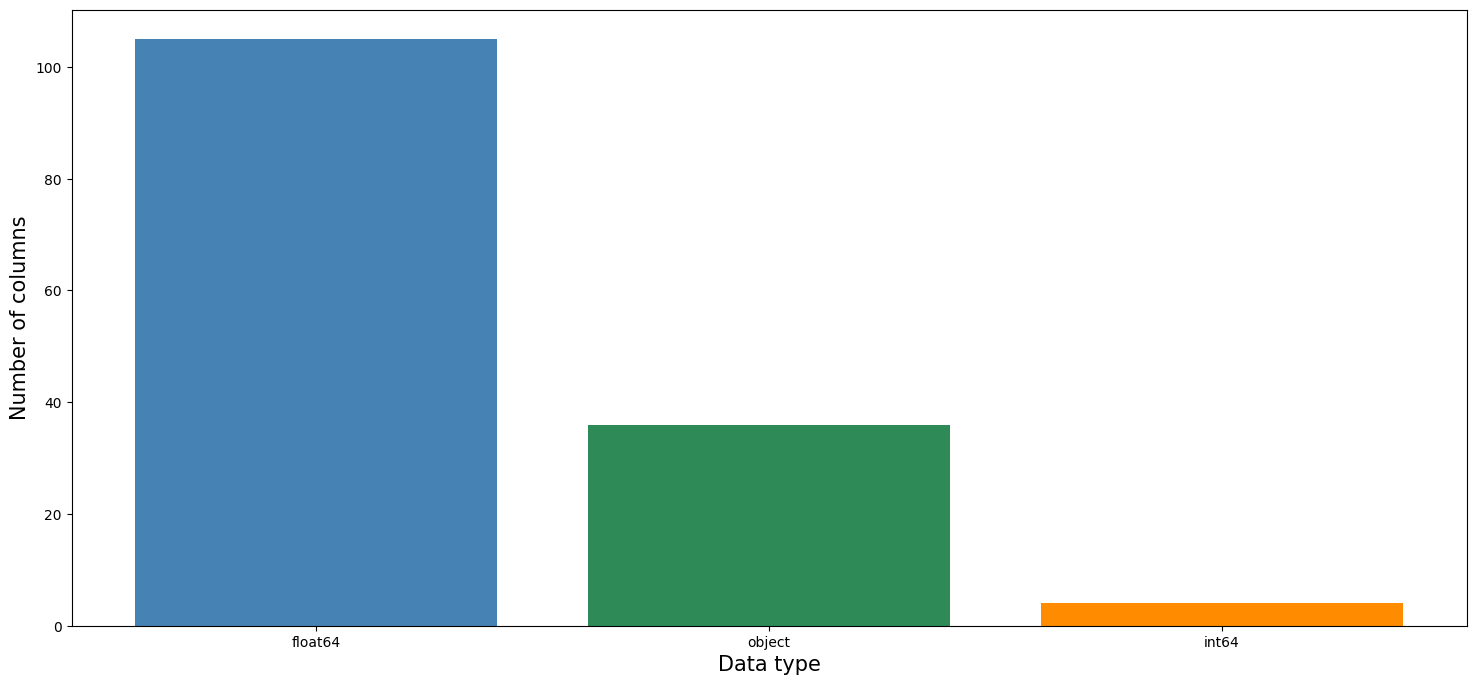

In [9]:
#Numbers of each data type
data_types_count = df.dtypes.value_counts()

#Define color palette as a dictionary
color_palette = {'float64': 'steelblue', 'int64': 'darkorange', 
                 'object': 'seagreen'}

#Get colors for each data type
colors = [color_palette[dt] for dt in data_types_count.index.astype(str)]

plt.figure(figsize=(18,8))
bars = plt.bar(data_types_count.index.astype(str), data_types_count.values, color=colors)
plt.ylabel('Number of columns', fontsize=15)
plt.xlabel('Data type', fontsize=15)

plt.show()

In [10]:
#Print data type counts
data_types_count

float64    105
object      36
int64        4
Name: count, dtype: int64

In [11]:
#Check the description for each column
description.style.set_properties(subset=['Description'], **{'width': '1000px'})

# Data Cleaning

## Missing Values

In [12]:
#Create a function to calculate the percentage of missing values for each column
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

#check missing values
miss_values = missing_values(df)
miss_values.head(10)

Dataframe has 145 columns.
There are 113 columns that have missing values.


Missing Values  % of Total Values
id                                                 2260668              100.0
url                                                2260668              100.0
member_id                                          2260668              100.0
orig_projected_additional_accrued_interest         2252242               99.6
hardship_length                                    2250055               99.5
hardship_reason                                    2250055               99.5
hardship_status                                    2250055               99.5
deferral_term                                      2250055               99.5
hardship_amount                                    2250055               99.5
hardship_start_date                                2250055               99.5

In [13]:
miss_values.tail(10)

Missing Values  % of Total Values
inq_last_6mths                30                0.0
open_acc                      29                0.0
total_acc                     29                0.0
earliest_cr_line              29                0.0
delinq_2yrs                   29                0.0
delinq_amnt                   29                0.0
acc_now_delinq                29                0.0
pub_rec                       29                0.0
annual_inc                     4                0.0
zip_code                       1                0.0

In [14]:
#Function to keep only columns with less than 30 missing values
def filter_columns_with_less_than_30_percent_missing(df):
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    cols_to_keep = mis_val_percent[mis_val_percent < 30].index.tolist()
    filtered_df = df[cols_to_keep]
    return filtered_df

filtered_df = filter_columns_with_less_than_30_percent_missing(df)

In [15]:
#Verify if we have successfully dropped columns had more than 70% missing values
filtered_df.shape   #It was (2260668, 145)

(2260668, 87)

In [16]:
##### Make a copy
df1 = filtered_df.copy()

### Check missing values(categorical)

In [17]:
#list categorical features
cat_col = df1.select_dtypes(include=['object']).columns

#Check missing values in categorical features
cat_mv = df1[cat_col].isnull().sum()

print("Missing values in categorical features:\n", cat_mv)

Missing values in categorical features:
 term                         0
grade                        0
sub_grade                    0
emp_title               166969
emp_length              146907
home_ownership               0
verification_status          0
issue_d                      0
loan_status                  0
pymnt_plan                   0
purpose                      0
title                    23326
zip_code                     1
addr_state                   0
earliest_cr_line            29
initial_list_status          0
last_pymnt_d              2426
last_credit_pull_d          73
application_type             0
hardship_flag                0
disbursement_method          0
debt_settlement_flag         0
dtype: int64


In [18]:
#Imputing with the most frequent value(mode)
df1['last_pymnt_d'].fillna(df1['last_pymnt_d'].mode()[0], inplace=True)
df1['earliest_cr_line'].fillna(df1['earliest_cr_line'].mode()[0], inplace=True)
df1['last_credit_pull_d'].fillna(df1['last_credit_pull_d'].mode()[0], inplace=True)

/tmp/ipykernel_18/2608825985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['last_pymnt_d'].fillna(df1['last_pymnt_d'].mode()[0], inplace=True)
/tmp/ipykernel_18/2608825985.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [19]:
#Drop the columns with more than ten thousand missing values, as they contribute significantly to the overall missing data
#Missing values in these variables are going to drop
var_drop= ['emp_title', 'emp_length', 'title', 'zip_code']

#Drop rows with missing values in any of the specified variables
df1 = df1.dropna(subset=var_drop)

#Verify
print("Missing values in categorical features:\n", df1[cat_col].isnull().sum())

Missing values in categorical features:
 term                    0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
verification_status     0
issue_d                 0
loan_status             0
pymnt_plan              0
purpose                 0
title                   0
zip_code                0
addr_state              0
earliest_cr_line        0
initial_list_status     0
last_pymnt_d            0
last_credit_pull_d      0
application_type        0
hardship_flag           0
disbursement_method     0
debt_settlement_flag    0
dtype: int64


### Check missing values(numeric)

In [20]:
#list numeric features
num_col = df1.select_dtypes(exclude=['object']).columns

#Check missing values in numeric features
num_mv = df1[num_col].isnull().sum().to_string()

print("Missing values in numeric features:\n", num_mv)

Missing values in numeric features:
 loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
int_rate                           0
installment                        0
annual_inc                         0
dti                               93
delinq_2yrs                       17
inq_last_6mths                    18
open_acc                          17
pub_rec                           17
revol_bal                          0
revol_util                      1589
total_acc                         17
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med       121
policy_code                        0
a

In [21]:
#Imputing missing values with mean
df1['dti'].fillna(df1['dti'].mean(), inplace=True)

/tmp/ipykernel_18/728670567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['dti'].fillna(df1['dti'].mean(), inplace=True)


In [22]:
#Drop other missing values
df1 = df1.dropna(subset=num_col)

#Verify
print("Missing values in numeric features after cleaning:")
print(df1[num_col].isnull().sum().to_string())

Missing values in numeric features after cleaning:
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim     

In [23]:
#Verify
df1.shape  #It was (2260668, 87)

(1654107, 87)

In [24]:
### Make a copy
df2 = df1.copy()

## Outliers

In [25]:
#list numeric features along with their statistical description
pd.set_option('display.float_format', lambda x: '%.2f' % x)
des = df2.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()
print(des.to_string())

                                count      mean       std     min      25%       50%       75%          max
loan_amnt                  1654107.00  15401.42   9235.52 1000.00  8000.00  13725.00  20000.00     40000.00
funded_amnt                1654107.00  15401.41   9235.52 1000.00  8000.00  13725.00  20000.00     40000.00
funded_amnt_inv            1654107.00  15396.19   9233.35  725.00  8000.00  13725.00  20000.00     40000.00
int_rate                   1654107.00     13.21      4.87    5.31     9.75     12.69     16.01        30.99
installment                1654107.00    455.39    268.52    4.93   260.25    388.11    605.30      1719.83
annual_inc                 1654107.00  81546.34 115957.70    0.00 50000.00  70000.00  97000.00 110000000.00
dti                        1654107.00     19.07     11.39   -1.00    12.43     18.22     24.74       999.00
delinq_2yrs                1654107.00      0.31      0.87    0.00     0.00      0.00      0.00        39.00
inq_last_6mths             1

### loan_amnt, funded_amnt, funded_amnt_inv, and installment

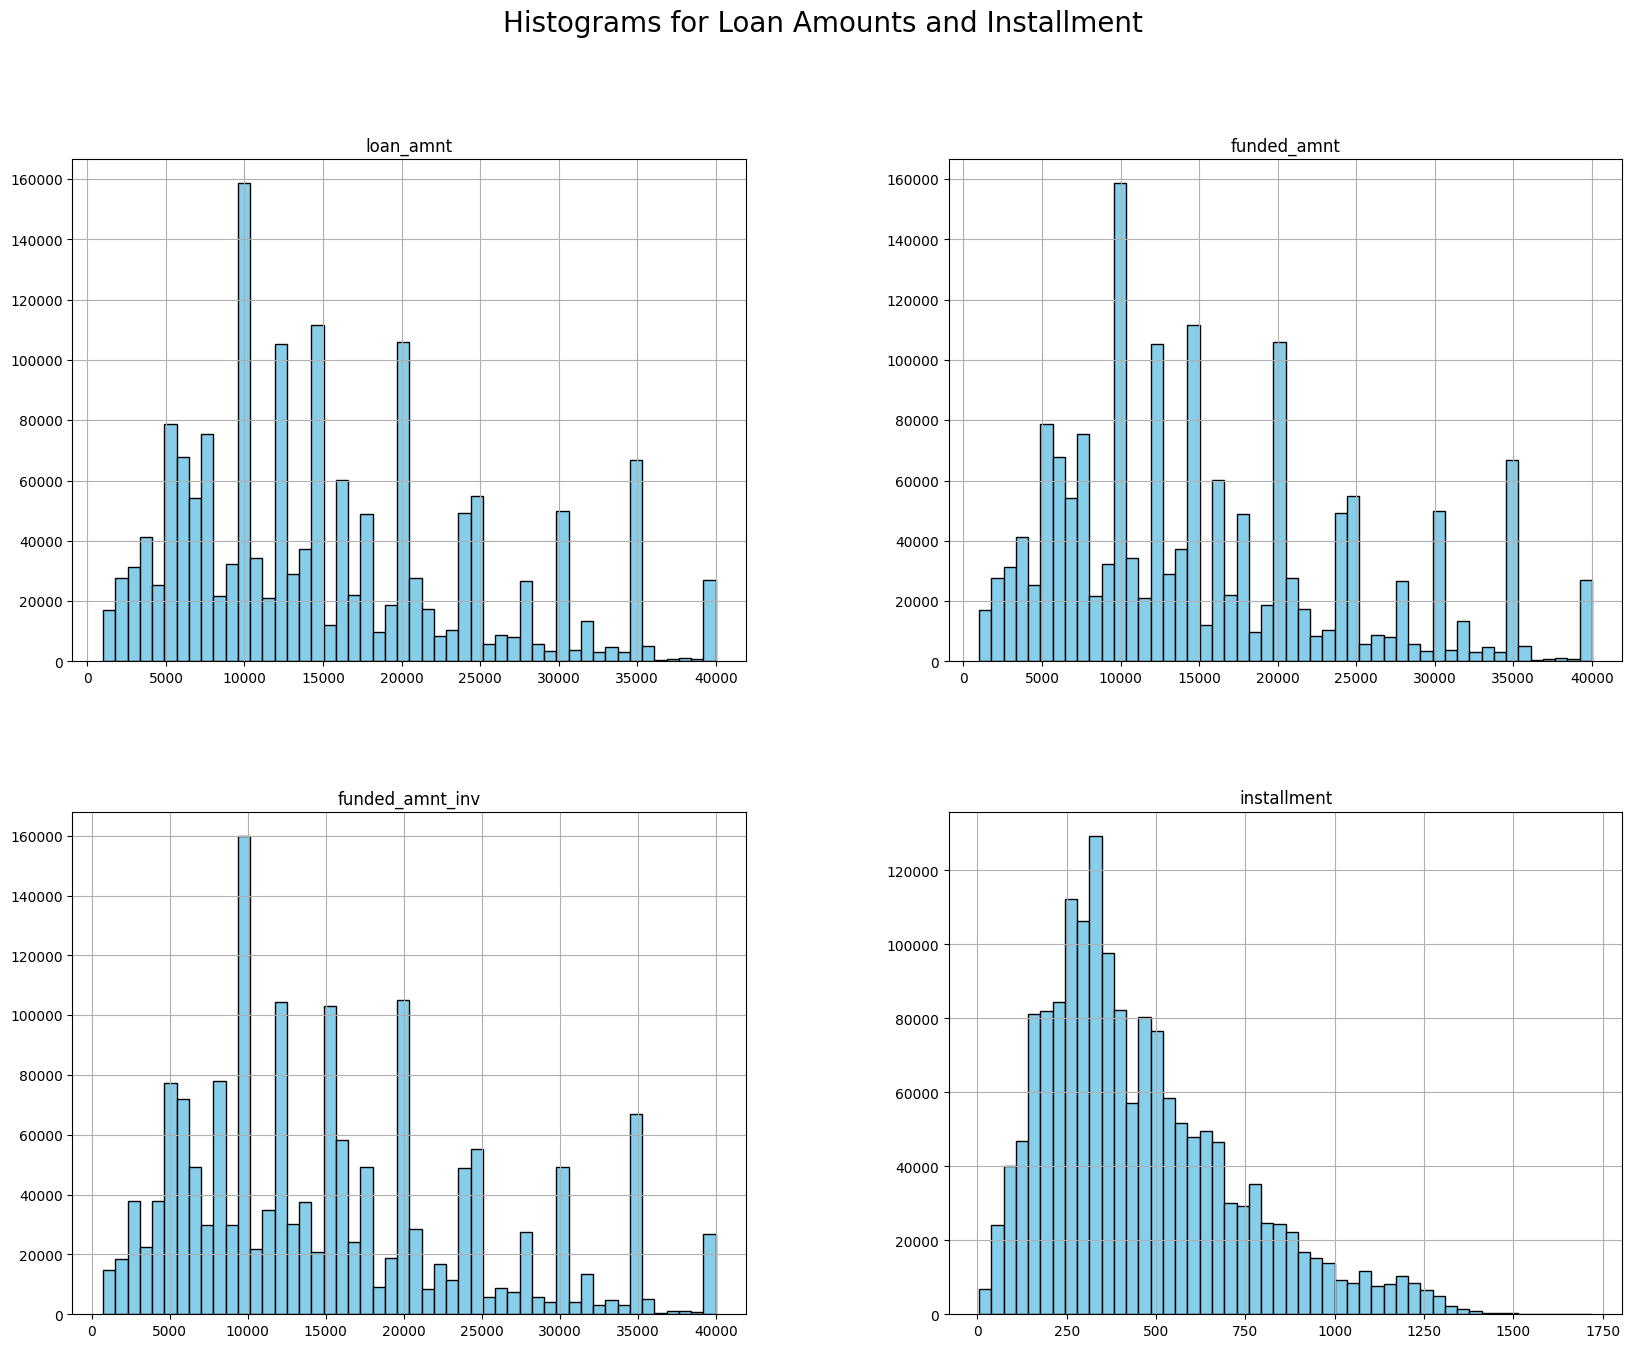

In [26]:
#Plotting histograms
df2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment']].hist(bins=50, figsize=(20, 15), 
                                                                            layout=(2,2), color='skyblue', edgecolor='black')

plt.suptitle('Histograms for Loan Amounts and Installment', fontsize=20)
plt.show()

In [27]:
#We observed that loan_amnt, funded_amnt and funded_amnt_inv have similar distributions, so we only keep one of them
#Also we keep installment
df2.drop(columns=['funded_amnt', 'funded_amnt_inv'], inplace=True)

In [28]:
#The installment shows a different distribution pattern compared to the loan amount variables.
#It has a right-skewed distribution indicating that most loans have smaller monthly payments.
#Drop the payments larger than 1100
df2= df2[df2['installment'] <= 1100]

### int_rate

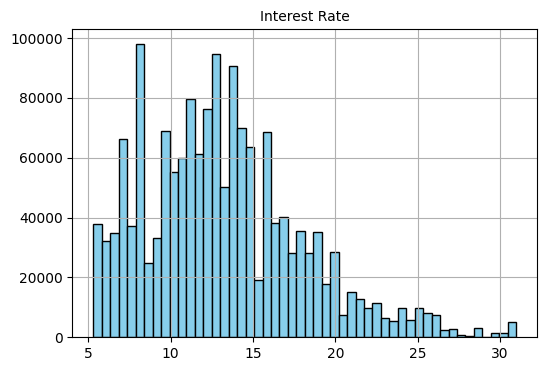

In [29]:
#Plotting histogram for int_rate
df2['int_rate'].hist(bins=50, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Interest Rate', fontsize=10)
plt.show()

In [30]:
#Drop the int_rate larger than 25
df2= df2[df2['int_rate'] <= 25]

### annual_inc

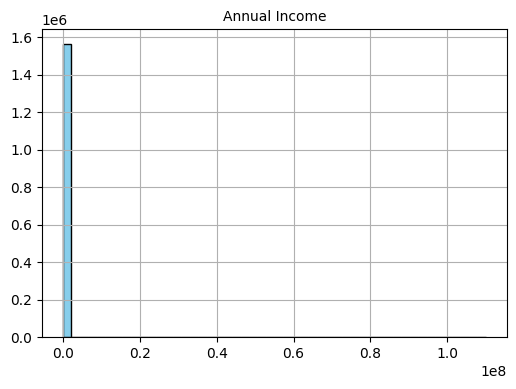

In [31]:
#Plotting histogram for annual_inc
df2['annual_inc'].hist(bins=50, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Annual Income', fontsize=10)
plt.show()

In [32]:
#Remove outliers using IQR
#Find the 25 and 75 percentiles
q1, q3 = np.percentile(df2['annual_inc'],[25, 75])

#Find the IQR and the cutoffs for the outliers
IQR = q3 - q1
lowerOutliers= q1 - 1.5*IQR  
upperOutliers= q3 + 1.5*IQR   
print(lowerOutliers, upperOutliers)

-17500.0 162500.0


In [33]:
#Drop outliers in annual_inc
df2 = df2[(df2['annual_inc'] >= 17500) & (df2['annual_inc'] <=162500) ]

### dti

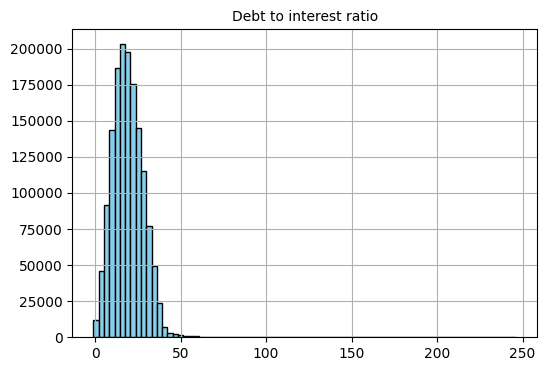

In [34]:
#Plotting histogram for dti
df2['dti'].hist(bins=80, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Debt to interest ratio', fontsize=10)
plt.show()

In [35]:
#Drop outlier in dti
df2 = df2[(df2['dti'] >0) & (df2['dti'] <=50) ]

### open_acc and total_acc

In [36]:
#Plotting histograms
df2[['open_acc', 'total_acc']].hist(bins=50, figsize=(20, 15), layout=(2,2), color='skyblue', edgecolor='black')

array([[<Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'total_acc'}>],
       [<Axes: >, <Axes: >]], dtype=object)

In [37]:
#Drop outliers in both variables
df2 = df2[df2['total_acc'] <=60]
df2 = df2[df2['open_acc'] <=30]

### pub_rec, 
number of derogatory public records

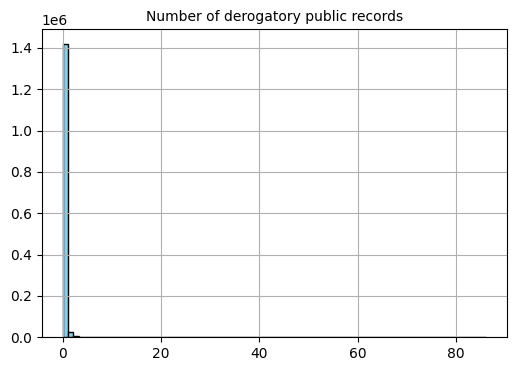

In [38]:
#Plotting histogram for puc_rec
df2['pub_rec'].hist(bins=80, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Number of derogatory public records', fontsize=10)
plt.show()

In [39]:
#Find the 25 and 75 percentiles
q1, q3 = np.percentile(df2['pub_rec'],[25, 75])

#Find the IQR and the cutoffs for the outliers
IQR = q3 - q1
lowerOutliers= q1 - 1.5*IQR  
upperOutliers= q3 + 1.5*IQR   
print(lowerOutliers, upperOutliers)

0.0 0.0


In [40]:
#Drop the variable due to its low variations
df2.drop(columns=['pub_rec'], inplace=True)

### delinq_2yrs,
The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [41]:
#Plotting histogram for delinq_2yrs
df2['delinq_2yrs'].hist(bins=80, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Number of Delinquency for the Past 2 Years', fontsize=10)
plt.show()

In [42]:
#Since majority values are clustered in 0, we decide to drop the column
df2.drop(columns=['delinq_2yrs'], inplace=True)

### inq_last_6mths,
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

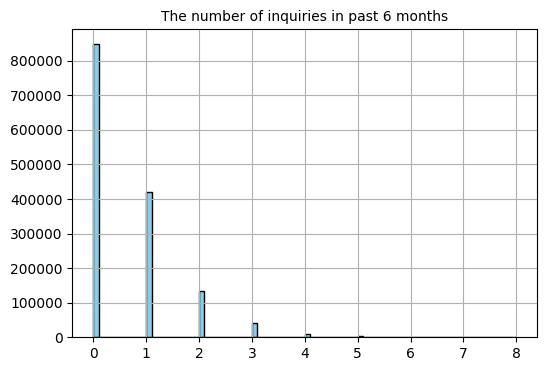

In [43]:
#Plotting histogram for delinq_2yrs
df2['inq_last_6mths'].hist(bins=80, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('The number of inquiries in past 6 months', fontsize=10)
plt.show()

In [44]:
#It looks like a categorical variable(object for convinience), so convert it
df2['inq_last_6mths'] = df2['inq_last_6mths'].astype('object')

### revol_bal, 
Total credit revolving balance
### revol_util, 
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

array([[<Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: >, <Axes: >]], dtype=object)

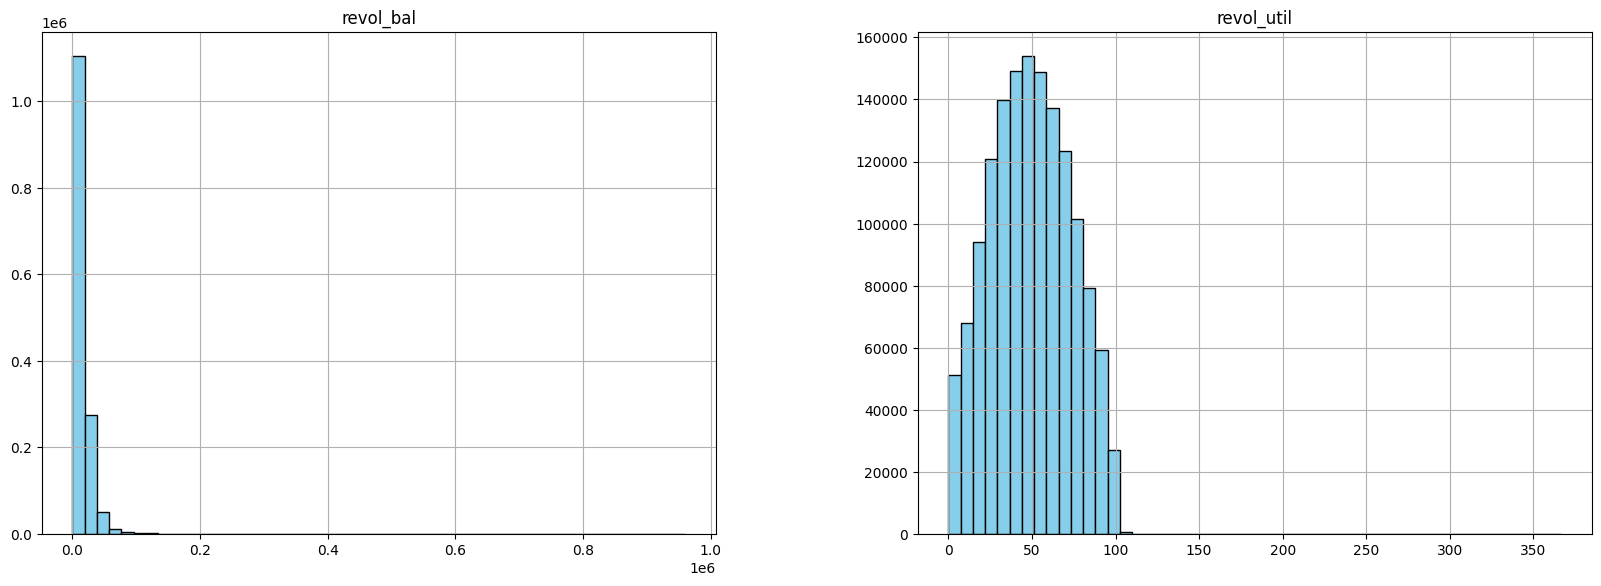

In [45]:
#Plotting histograms
df2[['revol_bal', 'revol_util']].hist(bins=50, figsize=(20, 15), layout=(2,2), color='skyblue', edgecolor='black')

In [46]:
#Find the 25 and 75 percentiles
q1, q3 = np.percentile(df2['revol_bal'],[25, 75])

#Find the IQR and the cutoffs for the outliers
IQR = q3 - q1
lowerOutliers= q1 - 1.5*IQR  
upperOutliers= q3 + 1.5*IQR   
print(lowerOutliers, upperOutliers)

-13368.5 38035.5


In [47]:
#Drop column(revol_bal), notes if we remove outliers, we will lose more than 1 million rows, better drop the column
df2.drop(columns=['revol_bal'], inplace=True)

In [48]:
#Drop outlier in revol_util
df2 = df2[df2['revol_util'] <= 100]

### out_prncp, 
Remaining outstanding principal for total amount funded
### out_prncp_inv, 
Remaining outstanding principal for portion of total amount funded by investors

In [49]:
#Plotting histograms
df2[['out_prncp', 'out_prncp_inv']].hist(bins=50, figsize=(20, 15), layout=(2,2), color='skyblue', edgecolor='black')

array([[<Axes: title={'center': 'out_prncp'}>,
        <Axes: title={'center': 'out_prncp_inv'}>],
       [<Axes: >, <Axes: >]], dtype=object)

In [50]:
#Drop out_prncp_inv (Not going to drop outliers since a large outstanding pricipal might be an indicator of a loan that's 
#at risk of defaulting)
df2.drop(columns = ['out_prncp_inv'], inplace = True)

### total_pymnt,
Payments received to date for total amount funded
### total_pymnt_inv,
Payments received to date for portion of total amount funded by investors
### last_pymnt_amnt
Last total payment amount received

In [51]:
#Plotting histograms
df2[['total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt']].hist(bins=50, figsize=(20, 15), layout=(2,2), 
                                                                color='skyblue', edgecolor='black')

array([[<Axes: title={'center': 'total_pymnt'}>,
        <Axes: title={'center': 'total_pymnt_inv'}>],
       [<Axes: title={'center': 'last_pymnt_amnt'}>, <Axes: >]],
      dtype=object)

In [52]:
#Drop total_pymnt_inv
df2.drop(columns = ['total_pymnt_inv'], inplace = True)

### total_rec_prncp  
Principal received to date
### total_rec_int 
Interest received to date
### total_rec_late_fee 
Late fees received to date

array([[<Axes: title={'center': 'total_rec_prncp'}>,
        <Axes: title={'center': 'total_rec_int'}>],
       [<Axes: title={'center': 'total_rec_late_fee'}>, <Axes: >]],
      dtype=object)

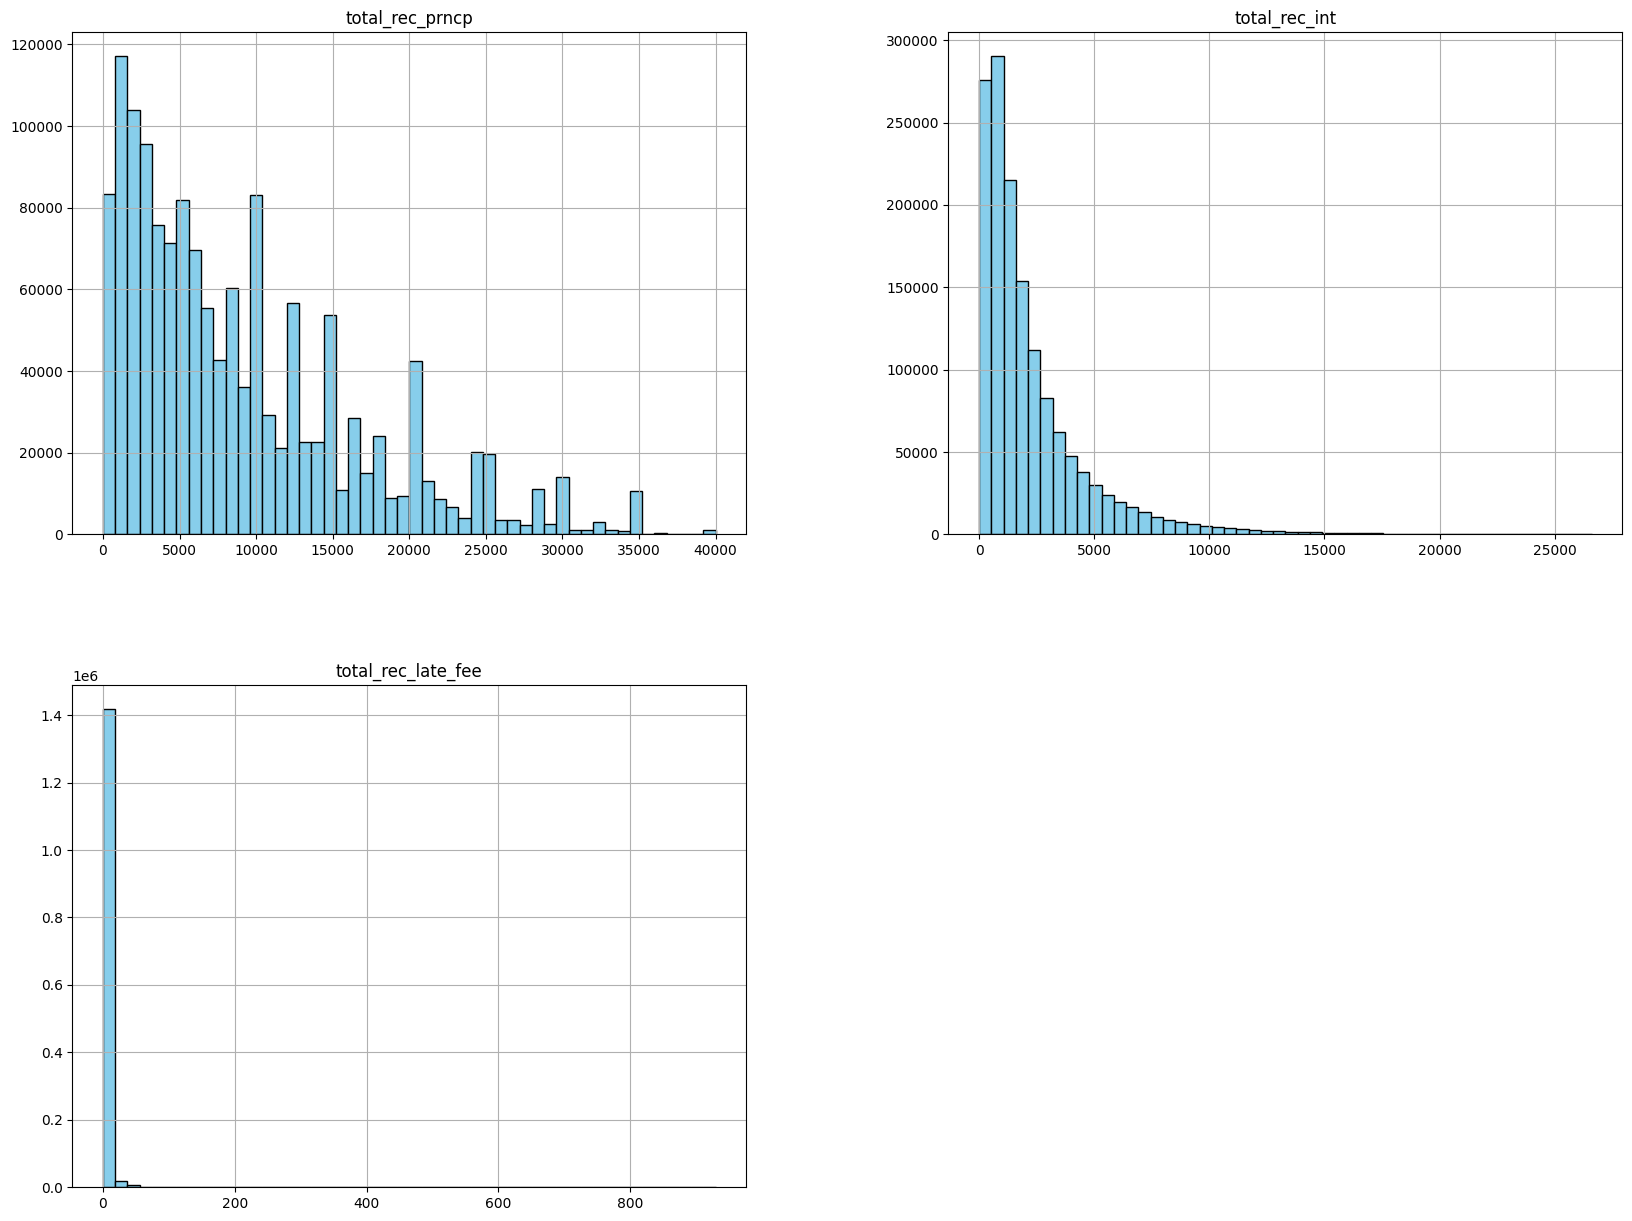

In [53]:
#Plotting histograms
df2[['total_rec_prncp', 'total_rec_int', 'total_rec_late_fee']].hist(bins=50, figsize=(20, 15), layout=(2,2), 
                                                                color='skyblue', edgecolor='black')

In [54]:
#Drop total_rec_late_fee
df2.drop(columns = ['total_rec_late_fee'], inplace = True)

### recoveries
post charge off gross recovery
### collection_recovery_fee
post charge off collection fee

array([[<Axes: title={'center': 'recoveries'}>,
        <Axes: title={'center': 'collection_recovery_fee'}>],
       [<Axes: >, <Axes: >]], dtype=object)

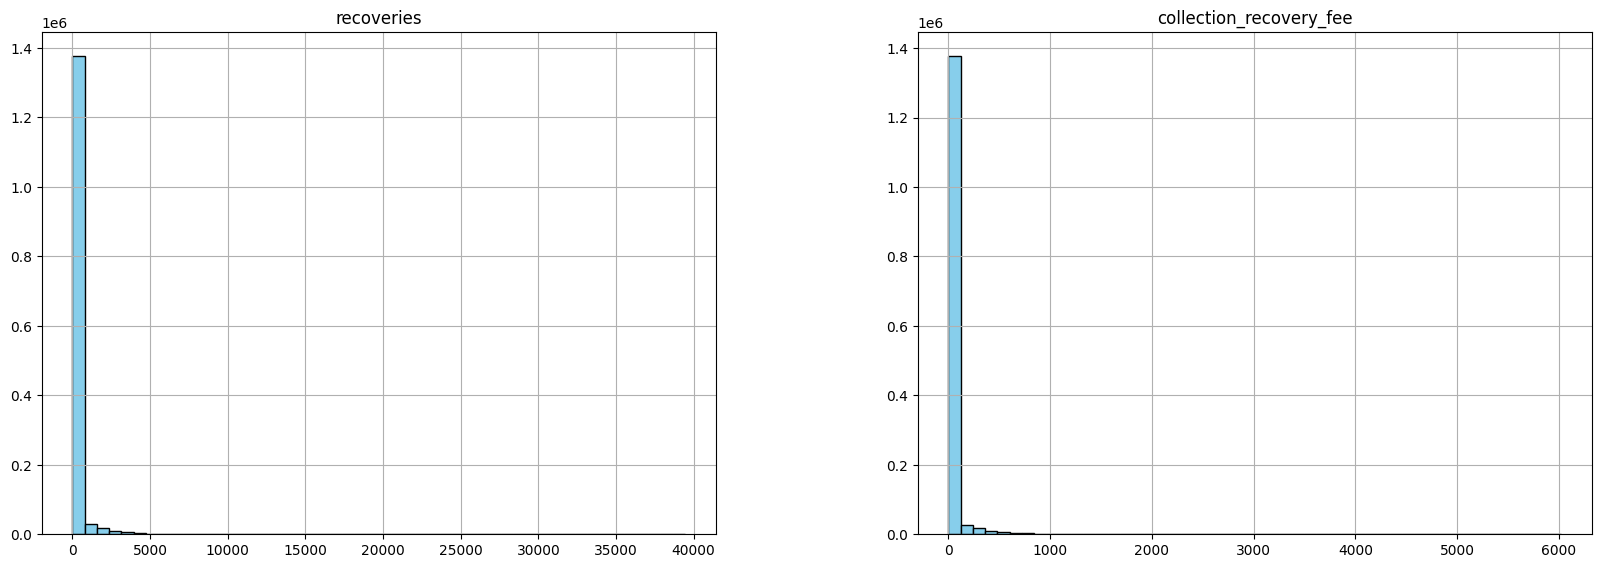

In [55]:
#Plotting histograms
df2[['recoveries', 'collection_recovery_fee']].hist(bins=50, figsize=(20, 15), layout=(2,2), color='skyblue', edgecolor='black')

In [56]:
#Drop both columns, not relevant to loan default
df2.drop(columns = ['recoveries', 'collection_recovery_fee'], inplace = True)

### collections_12_mths_ex_med
Number of collections in 12 months excluding medical collections

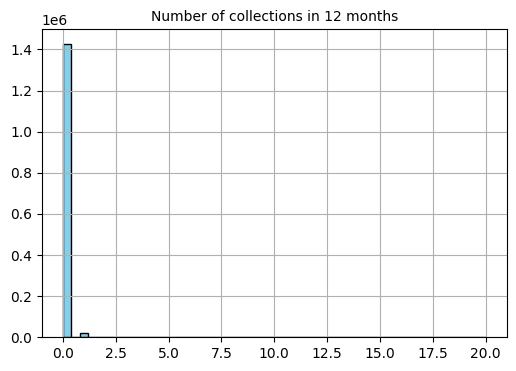

In [57]:
#Plot
df2['collections_12_mths_ex_med'].hist(bins=50, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Number of collections in 12 months', fontsize=10)
plt.show()

In [58]:
#It may have an impact on loan default, so covert it to category(object)
df2['collections_12_mths_ex_med'] = df2['collections_12_mths_ex_med'].astype('object')

### policy_code
publicly available policy_code=1 new products not publicly available policy_code=2

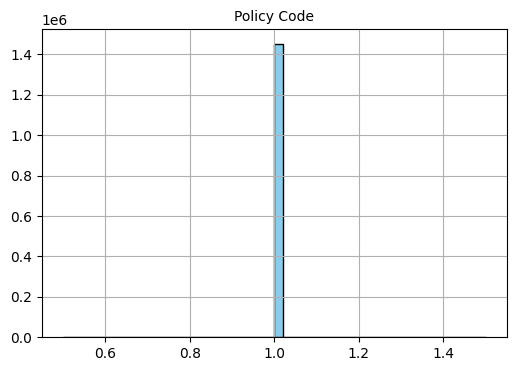

In [59]:
#Plot
df2['policy_code'].hist(bins=50, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Policy Code', fontsize=10)
plt.show()

In [60]:
#Drop it
df2.drop(columns = ['policy_code'], inplace = True)

### acc_now_delinq
The number of accounts on which the borrower is now delinquent.

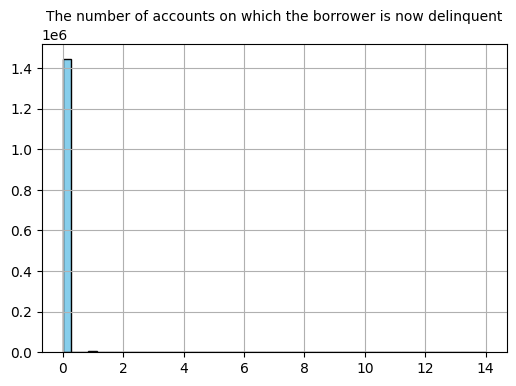

In [61]:
#Plot
df2['acc_now_delinq'].hist(bins=50, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('The number of accounts on which the borrower is now delinquent', fontsize=10)
plt.show()

In [62]:
#Could be an indicator, cover it to categorical variable(object)
df2['acc_now_delinq'] = df2['acc_now_delinq'].astype('object')

### tot_coll_amt   
Total collection amounts ever owed
### tot_cur_bal
Total current balance of all accounts
### avg_cur_bal
Average current balance of all accounts

In [63]:
#Plotting histograms
df2[['tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal']].hist(bins=50, figsize=(20, 15), layout=(2,2), 
                                          color='skyblue', edgecolor='black')

array([[<Axes: title={'center': 'tot_coll_amt'}>,
        <Axes: title={'center': 'tot_cur_bal'}>],
       [<Axes: title={'center': 'avg_cur_bal'}>, <Axes: >]], dtype=object)

In [64]:
#Drop tot_coll_amt, clustered at low amount, drop avg_cur_bal(an average of all accounts)
df2.drop(columns = ['tot_coll_amt', 'avg_cur_bal'], inplace = True)

In [65]:
#Find the 25 and 75 percentiles
q1, q3 = np.percentile(df2['tot_cur_bal'],[25, 75])

#Find the IQR and the cutoffs for the outliers
IQR = q3 - q1
lowerOutliers= q1 - 1.5*IQR  
upperOutliers= q3 + 1.5*IQR   
print(lowerOutliers, upperOutliers)

-233474.0 473862.0


In [66]:
#Considering to drop values larger than upper cutoff
df2 = df2[df2['tot_cur_bal'] <= 473862]

### total_rev_hi_lim
Total high credit/credit limit

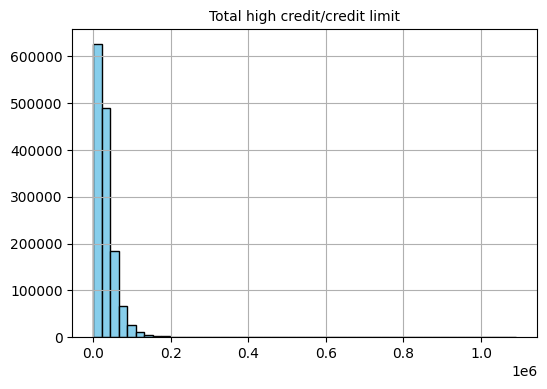

In [67]:
#Plot
df2['total_rev_hi_lim'].hist(bins=50, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Total high credit/credit limit', fontsize=10)
plt.show()

In [68]:
#Find the 25 and 75 percentiles
q1, q3 = np.percentile(df2['total_rev_hi_lim'],[25, 75])

#Find the IQR and the cutoffs for the outliers
IQR = q3 - q1
lowerOutliers= q1 - 1.5*IQR  
upperOutliers= q3 + 1.5*IQR   
print(lowerOutliers, upperOutliers)

-23766.125 78276.875


In [69]:
#Considering to drop values larger than upper cutoff
df2 = df2[df2['total_rev_hi_lim'] <= 78276.875]

### acc_open_past_24mths
Number of trades opened in past 24 months

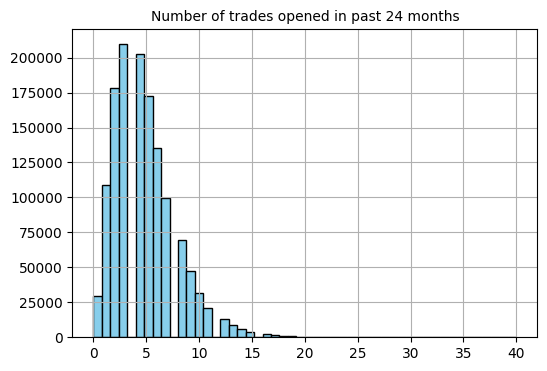

In [70]:
#Plot
df2['acc_open_past_24mths'].hist(bins=50, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Number of trades opened in past 24 months', fontsize=10)
plt.show()

In [71]:
#Remove outliers
df2 = df2[df2['acc_open_past_24mths'] <= 13]

### bc_open_to_buy 
Total open to buy on revolving bankcards
### bc_util
Ratio of total current balance to high credit/credit limit for all bankcard accounts

In [72]:
#Plotting histograms
df2[['bc_open_to_buy', 'bc_util']].hist(bins=50, figsize=(20, 15), layout=(2,2), 
                                          color='skyblue', edgecolor='black')

array([[<Axes: title={'center': 'bc_open_to_buy'}>,
        <Axes: title={'center': 'bc_util'}>],
       [<Axes: >, <Axes: >]], dtype=object)

In [73]:
#remove outliers
df2 = df2[df2['bc_open_to_buy'] <= 40000]
df2 = df2[df2['bc_util'] <= 100]

### chargeoff_within_12_mths
Number of charge-offs within 12 months

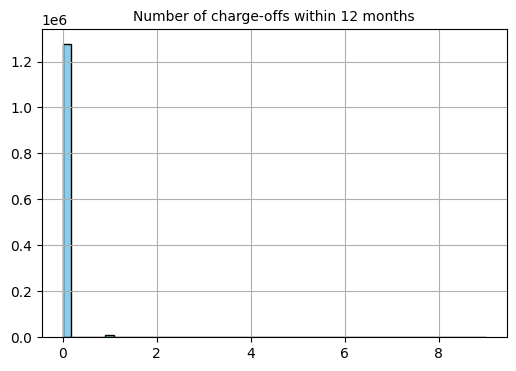

In [74]:
#Plot
df2['chargeoff_within_12_mths'].hist(bins=50, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Number of charge-offs within 12 months', fontsize=10)
plt.show()

In [75]:
#Could be a potential feature to predcit loan default, cover it to categorical
df2['chargeoff_within_12_mths'] = df2['chargeoff_within_12_mths'].astype('object')

### delinq_amnt
The past-due amount owed for the accounts on which the borrower is now delinquent

In [76]:
#Plot
df2['delinq_amnt'].hist(bins=50, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Amount owed for accounts', fontsize=10)
plt.show()

In [77]:
#Low variations, drop it
df2.drop(columns = ['delinq_amnt'], inplace = True)

### mo_sin_old_il_acct 
Months since oldest bank installment account opened
### mo_sin_old_rev_tl_op
Months since oldest revolving account opened
### mo_sin_rcnt_rev_tl_op 
Months since most recent revolving account opened
### mo_sin_rcnt_tl
Months since most recent account opened

In [78]:
#Plotting histograms
df2[['mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl']].hist(bins=50, figsize=(20, 15), 
                                                              layout=(2,2), color='skyblue', edgecolor='black')

array([[<Axes: title={'center': 'mo_sin_old_il_acct'}>,
        <Axes: title={'center': 'mo_sin_old_rev_tl_op'}>],
       [<Axes: title={'center': 'mo_sin_rcnt_rev_tl_op'}>,
        <Axes: title={'center': 'mo_sin_rcnt_tl'}>]], dtype=object)

In [79]:
#Remove outliers(These variables maybe not relevant to our target variable)
df2 = df2[df2['mo_sin_old_il_acct'] <= 250]
df2 = df2[df2['mo_sin_old_rev_tl_op'] <= 400]
df2 = df2[df2['mo_sin_rcnt_rev_tl_op'] <= 50]
df2 = df2[df2['mo_sin_rcnt_tl'] <= 25]

### num_accts_ever_120_pd 
Number of accounts ever 120 or more days past due
### num_actv_bc_tl 
Number of currently active bankcard accounts
### num_actv_rev_tl 
Number of currently active revolving trades

In [80]:
#Plotting histograms
df2[['num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl']].hist(bins=50, figsize=(20, 15), 
                                                              layout=(2,2), color='skyblue', edgecolor='black')

array([[<Axes: title={'center': 'num_accts_ever_120_pd'}>,
        <Axes: title={'center': 'num_actv_bc_tl'}>],
       [<Axes: title={'center': 'num_actv_rev_tl'}>, <Axes: >]],
      dtype=object)

In [81]:
#Drop num_accts_ever_120_pd, clustered at "0", also remove outliers in other two variables
df2.drop(columns = ['num_accts_ever_120_pd'], inplace = True)

df2 = df2[df2['num_actv_bc_tl'] <= 10]
df2 = df2[df2['num_actv_rev_tl'] <= 15]

### num_bc_sats
Number of satisfactory bankcard accounts
### num_bc_tl
Number of bankcard accounts
### num_il_tl 
Number of installment accounts

In [82]:
#Plotting histograms
df2[['num_bc_sats', 'num_bc_tl', 'num_il_tl']].hist(bins=50, figsize=(20, 15), layout=(2,2), color='skyblue', edgecolor='black')

array([[<Axes: title={'center': 'num_bc_sats'}>,
        <Axes: title={'center': 'num_bc_tl'}>],
       [<Axes: title={'center': 'num_il_tl'}>, <Axes: >]], dtype=object)

In [83]:
#Remove outliers in all variables
df2 = df2[df2['num_bc_sats'] <= 10]
df2 = df2[df2['num_bc_tl'] <= 20]
df2 = df2[df2['num_il_tl'] <= 25]

### num_op_rev_tl
Number of open revolving accounts
### num_rev_accts 
Number of revolving accounts
### num_rev_tl_bal_gt_0
Number of revolving trades with balance >0
### num_sats    
Number of satisfactory accounts

In [84]:
#Plotting histograms
df2[['num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats']].hist(bins=50, figsize=(20, 15),
                                                      layout=(2,2), color='skyblue', edgecolor='black')

array([[<Axes: title={'center': 'num_op_rev_tl'}>,
        <Axes: title={'center': 'num_rev_accts'}>],
       [<Axes: title={'center': 'num_rev_tl_bal_gt_0'}>,
        <Axes: title={'center': 'num_sats'}>]], dtype=object)

In [85]:
#Remove outliers (They have similar distributions)
df2 = df2[df2['num_op_rev_tl'] <= 20]
df2 = df2[df2['num_rev_accts'] <= 30]
df2 = df2[df2['num_rev_tl_bal_gt_0'] <= 13]
df2 = df2[df2['num_sats'] <= 22]

### num_tl_120dpd_2m
Number of accounts currently 120 days past due (updated in past 2 months)
### num_tl_30dpd 
Number of accounts currently 30 days past due (updated in past 2 months)
### num_tl_90g_dpd_24m
Number of accounts 90 or more days past due in last 24 months
### num_tl_op_past_12m 
Number of accounts opened in past 12 months

In [86]:
#Plotting histograms
df2[['num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m']].hist(bins=50, figsize=(20, 15),
                                                      layout=(2,2), color='skyblue', edgecolor='black')

array([[<Axes: title={'center': 'num_tl_120dpd_2m'}>,
        <Axes: title={'center': 'num_tl_30dpd'}>],
       [<Axes: title={'center': 'num_tl_90g_dpd_24m'}>,
        <Axes: title={'center': 'num_tl_op_past_12m'}>]], dtype=object)

In [87]:
#Only keep num_tl_op_past_12, drop rest
df2.drop(columns = ['num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m'], inplace = True)
df2 = df2[df2['num_tl_op_past_12m'] <= 6]

In [88]:
#Cover it to categorical 
df2['num_tl_op_past_12m'] = df2['num_tl_op_past_12m'].astype('object')

### pct_tl_nvr_dlq
Percent of trades never delinquent

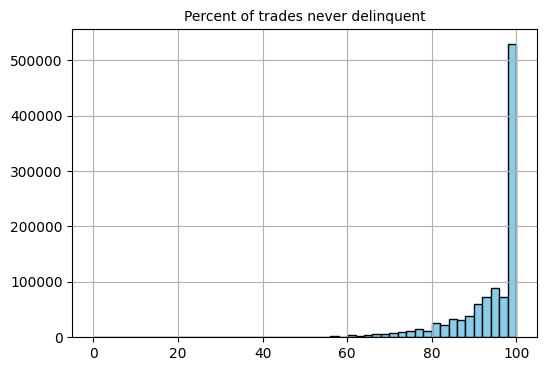

In [89]:
#Plot
df2['pct_tl_nvr_dlq'].hist(bins=50, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Percent of trades never delinquent', fontsize=10)
plt.show()

In [90]:
#remove outliers
df2 = df2[df2['pct_tl_nvr_dlq'] >= 80]

### percent_bc_gt_75
Percentage of all bankcard accounts > 75% of limit

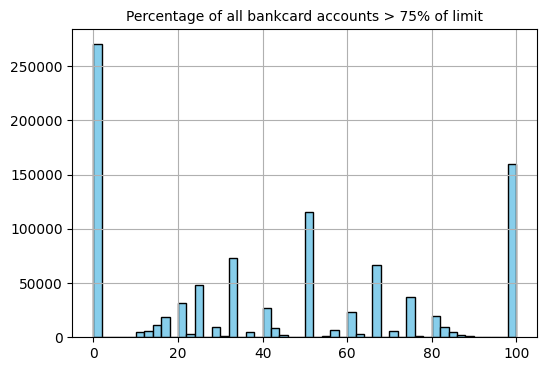

In [91]:
#Plot
df2['percent_bc_gt_75'].hist(bins=50, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Percentage of all bankcard accounts > 75% of limit', fontsize=10)
plt.show()

### pub_rec_bankruptcies
Number of public record bankruptcies

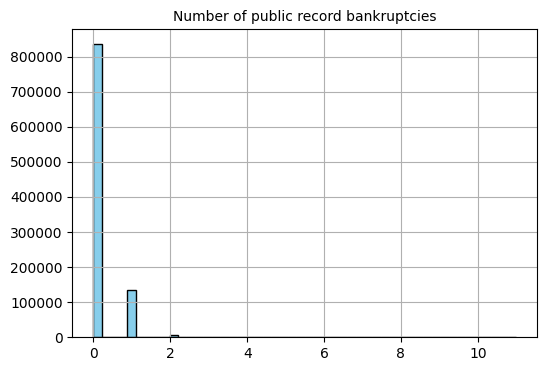

In [92]:
#Plot
df2['pub_rec_bankruptcies'].hist(bins=50, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Number of public record bankruptcies', fontsize=10)
plt.show()

In [93]:
#Could be an indicator, cover it to categorical variable(object)
df2['pub_rec_bankruptcies'] = df2['pub_rec_bankruptcies'].astype('object')

### tax_liens
Number of tax liens

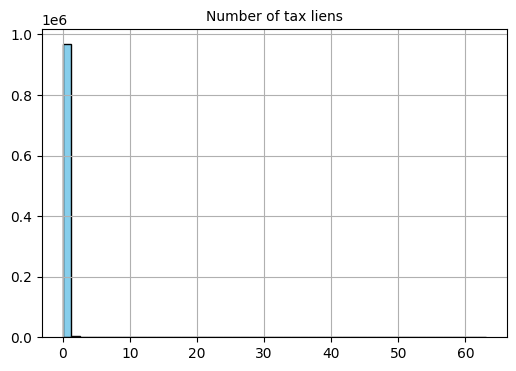

In [94]:
#Plot
df2['tax_liens'].hist(bins=50, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Number of tax liens', fontsize=10)
plt.show()

In [95]:
#drop it
df2.drop(columns = ['tax_liens'], inplace = True)

### tot_hi_cred_lim
Total high credit/credit limit

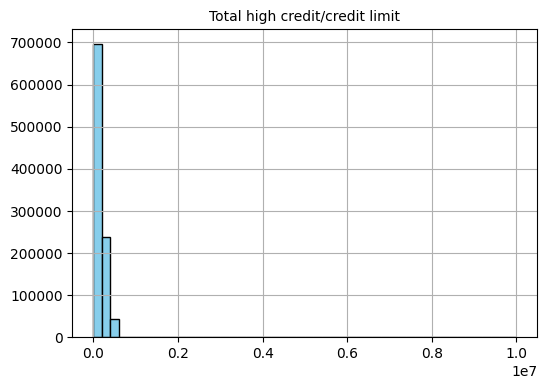

In [96]:
#Plot
df2['tot_hi_cred_lim'].hist(bins=50, figsize=(6, 4), color='skyblue', edgecolor='black')
plt.title('Total high credit/credit limit', fontsize=10)
plt.show()

In [97]:
#Drop
df2.drop(columns = ['tot_hi_cred_lim'], inplace = True)

### total_bal_ex_mort 
Total credit balance excluding mortgage
### total_bc_limit  
Total bankcard high credit/credit limit
### total_il_high_credit_limit 
Total installment high credit/credit limit

array([[<Axes: title={'center': 'total_bal_ex_mort'}>,
        <Axes: title={'center': 'total_bc_limit'}>],
       [<Axes: title={'center': 'total_il_high_credit_limit'}>, <Axes: >]],
      dtype=object)

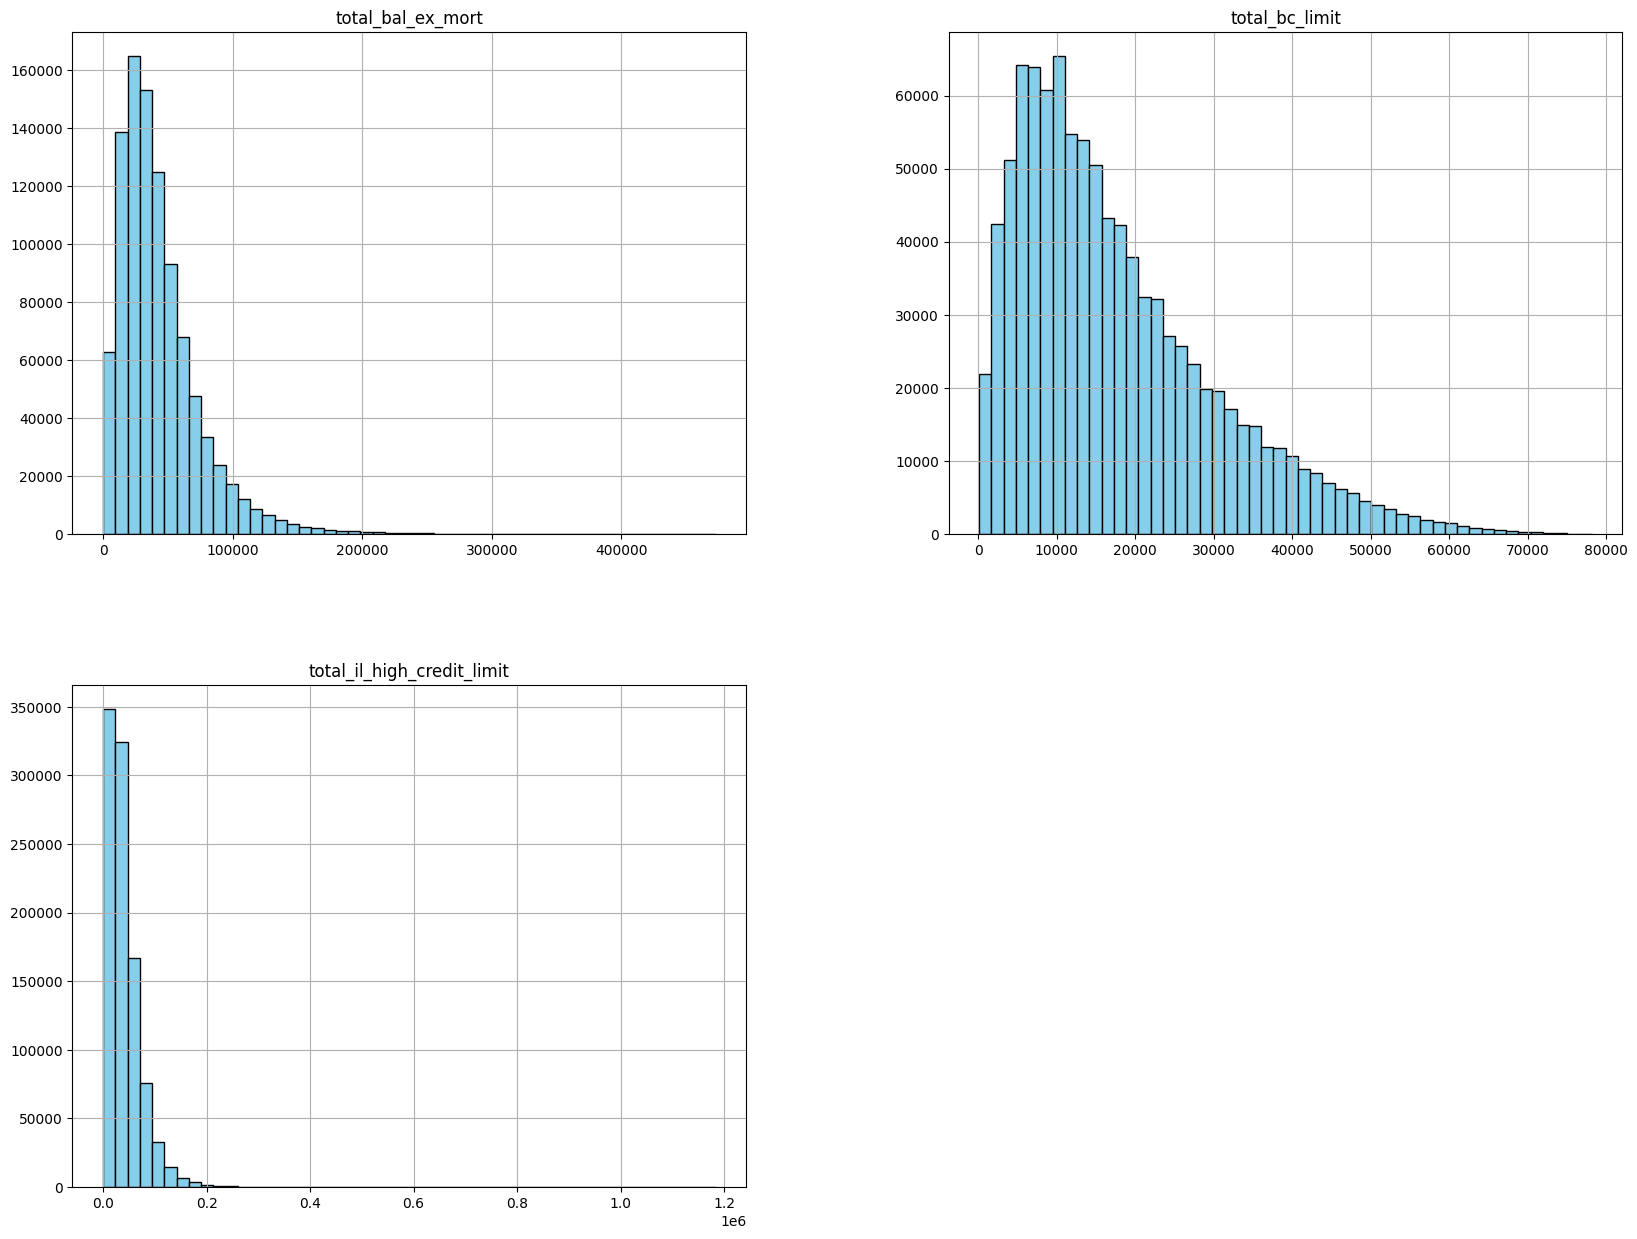

In [98]:
#Plotting histograms
df2[['total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']].hist(bins=50, figsize=(20, 15),
                                                      layout=(2,2), color='skyblue', edgecolor='black')

In [99]:
#remove outliers
df2 = df2[df2['total_bal_ex_mort'] <= 200000]
df2 = df2[df2['total_bc_limit'] <= 60000]

In [100]:
#Find the 25 and 75 percentiles
q1, q3 = np.percentile(df2['total_il_high_credit_limit'],[25, 75])

#Find the IQR and the cutoffs for the outliers
IQR = q3 - q1
lowerOutliers= q1 - 1.5*IQR  
upperOutliers= q3 + 1.5*IQR   
print(lowerOutliers, upperOutliers)

-37673.0 108223.0


In [101]:
df2 = df2[df2['total_il_high_credit_limit'] <= 108223]

In [102]:
df2.shape # It was (1654107, 87)

(932003, 67)

In [103]:
#Double check
df2.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

count      mean       std      min      25%  \
loan_amnt                  932003.00  13505.87   7827.09  1000.00  7700.00   
int_rate                   932003.00     13.07      4.28     5.31     9.93   
installment                932003.00    398.59    215.85     7.61   242.73   
annual_inc                 932003.00  65999.53  27964.22 17500.00 45000.00   
dti                        932003.00     18.54      8.27     0.01    12.44   
open_acc                   932003.00     10.58      3.89     1.00     8.00   
revol_util                 932003.00     49.95     23.19     0.00    32.70   
total_acc                  932003.00     21.45      8.87     3.00    15.00   
out_prncp                  932003.00   3635.68   6399.19     0.00     0.00   
total_pymnt                932003.00  10993.83   8839.29     0.00  4207.52   
total_rec_prncp            932003.00   8642.25   7321.23     0.00  2832.75   
total_rec_int              932003.00   2219.07   2473.59     0.00   666.42   
last_pymnt_amnt            932003.00   3226.11   5424.94     0.00   298.17   
tot_cur_bal                932003.00 110534.47 107269.36     0.00 27749.00   
total_rev_hi_lim           932003.00  25613.01  15125.53   100.00 14000.00   
acc_open_past_24mths       932003.00      4.51      2.43     0.00     3.00   
bc_open_to_buy             932003.00   7838.57   8340.20     0.00  1569.00   
bc_util                    932003.00     58.30     27.51     0.00    37.20   
mo_sin_old_il_acct         932003.00    115.78     48.99     0.00    82.00   
mo_sin_old_rev_tl_op       932003.00    156.50     78.89     1.00   101.00   
mo_sin_rcnt_rev_tl_op      932003.00     10.73      9.42     0.00     4.00   
mo_sin_rcnt_tl             932003.00      6.87      5.11     0.00     3.00   
mort_acc                   932003.00      1.37      1.74     0.00     0.00   
mths_since_recent_bc       932003.00     21.13     25.16     0.00     6.00   
mths_since_recent_inq      932003.00      7.36      6.01     0.00     2.00   
num_actv_bc_tl             932003.00      3.32      1.76     0.00     2.00   
num_actv_rev_tl            932003.00      5.12      2.51     0.00     3.00   
num_bc_sats                932003.00      4.16      2.02     0.00     3.00   
num_bc_tl                  932003.00      6.79      3.52     1.00     4.00   
num_il_tl                  932003.00      7.42      5.16     1.00     3.00   
num_op_rev_tl              932003.00      7.49      3.31     1.00     5.00   
num_rev_accts              932003.00     12.45      5.93     1.00     8.00   
num_rev_tl_bal_gt_0        932003.00      5.13      2.51     0.00     3.00   
num_sats                   932003.00     10.55      3.89     1.00     8.00   
pct_tl_nvr_dlq             932003.00     95.89      5.51    80.00    92.90   
percent_bc_gt_75           932003.00     42.38     35.77     0.00     0.00   
total_bal_ex_mort          932003.00  39036.54  24249.57     0.00 20780.00   
total_bc_limit             932003.00  17221.84  12181.88   100.00  7800.00   
total_il_high_credit_limit 932003.00  35313.84  24974.97     0.00 16446.00   

                                50%       75%       max  
loan_amnt                  12000.00  18000.00  40000.00  
int_rate                      12.74     15.88     24.99  
installment                  351.40    521.60   1099.89  
annual_inc                 60000.00  80100.00 162500.00  
dti                           17.94     24.17     50.00  
open_acc                      10.00     13.00     25.00  
revol_util                    49.90     67.40    100.00  
total_acc                     21.00     27.00     60.00  
out_prncp                      0.00   5328.24  39616.66  
total_pymnt                 8746.55  15567.51  61596.97  
total_rec_prncp             6588.28  12000.00  40000.00  
total_rec_int               1404.92   2812.96  26596.97  
last_pymnt_amnt              546.60   3996.14  41113.98  
tot_cur_bal                60476.00 177680.00 473857.00  
total_rev_hi_lim           22500.00  345

In [104]:
###### Make a copy
df3 = df2.copy()

### Check duplicated rows

In [105]:
#check if there are some duplicate rows
number_of_duplicates = df3.duplicated().sum()

print(f"Number of duplicate rows: {number_of_duplicates}")

Number of duplicate rows: 0


In [106]:
df3.head(7)

loan_amnt        term  int_rate  installment grade sub_grade  \
0        2500   36 months     13.56        84.92     C        C1   
2        5000   36 months     17.97       180.69     D        D1   
4       30000   60 months     16.14       731.78     C        C4   
7        6000   36 months     13.56       203.79     C        C1   
14      22000   60 months     12.98       500.35     B        B5   
16       7000   36 months     12.98       235.80     B        B5   
21      13000   36 months     14.47       447.29     C        C2   

             emp_title emp_length home_ownership  annual_inc  ...  \
0                 Chef  10+ years           RENT    55000.00  ...   
2       Administrative    6 years       MORTGAGE    59280.00  ...   
4             Mechanic  10+ years       MORTGAGE    57250.00  ...   
7   Assistant Director  10+ years           RENT    65000.00  ...   
14             Teller   10+ years       MORTGAGE    65000.00  ...   
16    Worship Director    4 years       MORTGAGE   102500.00  ...   
21   Exhibits director  10+ years       MORTGAGE    55000.00  ...   

   num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies  \
0                3.00         100.00             0.00                 1.00   
2                0.00         100.00             0.00                 0.00   
4                5.00          92.30             0.00                 0.00   
7                0.00         100.00            85.70                 0.00   
14               1.00         100.00             0.00                 0.00   
16               2.00          80.00             0.00                 0.00   
21               0.00         100.00            75.00                 0.00   

   total_bal_ex_mort total_bc_limit total_il_high_credit_limit hardship_flag  \
0           16901.00       36500.00                   18124.00             N   
2           11749.00       13800.00                   10000.00             N   
4           29674.00        9300.00                   32332.00             N   
7           91535.00       33100.00                   61742.00             N   
14          22337.00       27200.00                   38535.00             N   
16          76709.00        7200.00                   96826.00             N   
21          13878.00       13900.00                    1000.00             N   

    disbursement_method debt_settlement_flag  
0                  Cash                    N  
2                  Cash                    N  
4                  Cash                    N  
7             DirectPay                    N  
14                 Cash                    N  
16                 Cash                    N  
21                 Cash                    N  

[7 rows x 67 columns]

# Exploratory Data Analysis(EDA)

## Target Variable Analysis

In [107]:
#Check our target variable loan_status
df3['loan_status'].unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

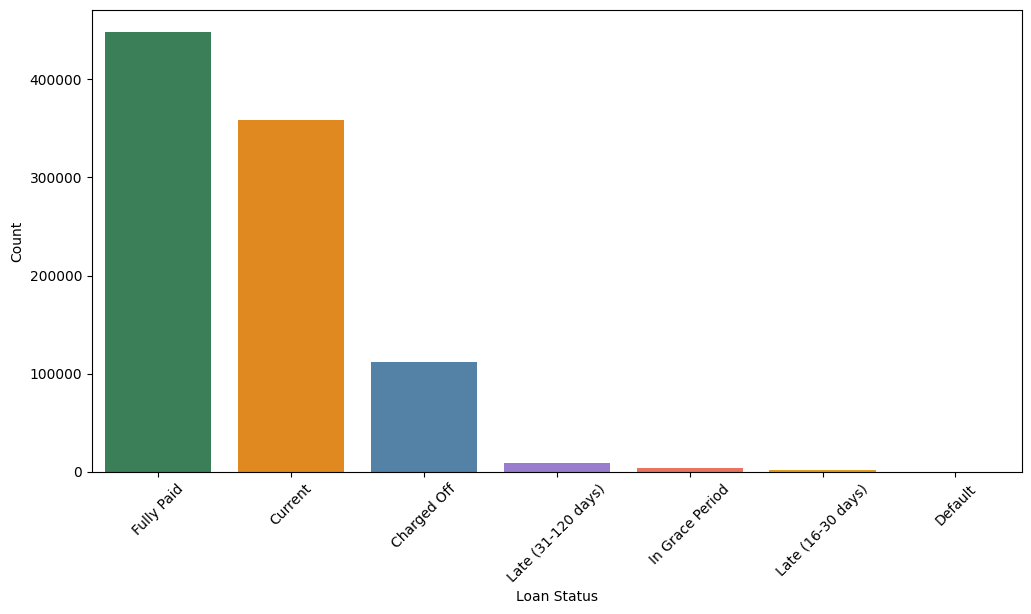

In [108]:
# Create a color palette with multiple colors
custom_palette = {
    'Current'            : 'darkorange',
    'Fully Paid'         : 'seagreen',
    'In Grace Period'    : 'tomato',
    'Late (31-120 days)' : 'mediumpurple',
    'Late (16-30 days)'  : 'orange',
    'Charged Off'        : 'steelblue',
    'Default'            : 'firebrick'
}

# Use value_counts() to count the occurrences of each value in the loan_status column
status_counts = df3['loan_status'].value_counts()

# Plotting the bar graph with custom colors
plt.figure(figsize=(12, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette=custom_palette)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [109]:
#Calculate the value counts of each category in 'loan_status'
loan_status_value_counts = df3['loan_status'].value_counts()

#Calculate the percentage of each category in 'loan_status'
percentage_loan_status = (loan_status_value_counts / len(df3['loan_status'])) * 100

#Combine the value counts and percentages into a DataFrame
loan_status_summary = pd.DataFrame({'Count': loan_status_value_counts, 'Percentage': percentage_loan_status})

#Print the results
print("Values in 'loan_status' and their percentages:")
print(loan_status_summary)

Values in 'loan_status' and their percentages:
                     Count  Percentage
loan_status                           
Fully Paid          448674       48.14
Current             358942       38.51
Charged Off         111374       11.95
Late (31-120 days)    8365        0.90
In Grace Period       3322        0.36
Late (16-30 days)     1312        0.14
Default                 14        0.00


#### Considering the values and their percentage in our target variable, we will only utilize 'Fully paid' and 'Charged off' for our project. The 'Charged off' category is defined by Lending Club, as they believe borrowers in this group are most likely to default.

In [110]:
#Drop other values for the target variable
df3 = df3[df3['loan_status'].isin(['Fully Paid', 'Charged Off'])]

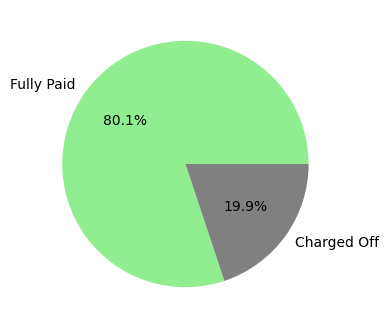

In [111]:
#Pie chart for target variable loan_status
loan_status_counts = df3['loan_status'].value_counts()

plt.figure(figsize=(8, 4))
plt.pie(loan_status_counts.values, labels=loan_status_counts.index, autopct='%1.1f%%', 
        colors=['lightgreen', 'grey'])
plt.show()

In [112]:
df3.shape #It was (932003, 67)

(560048, 67)

## Target Variable Imbalance
#### Due to the imbalance in the target variable, we will employ the random under sampling technique to reduce the majority class (fully paid).

In [113]:
#Separate features and target variable
X = df3.drop('loan_status', axis=1)
y = df3['loan_status']

#Initialize and fit to the data
rus = RandomUnderSampler(random_state = 123)
X_resampled, y_resampled = rus.fit_resample(X, y)

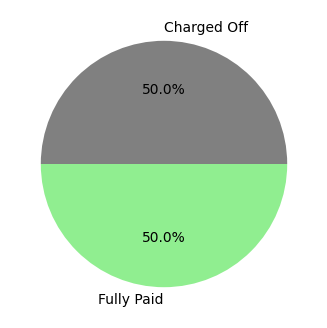

In [114]:
#Plot the pie chart
loan_status_resampled_counts = y_resampled.value_counts()

plt.figure(figsize=(8, 4))
plt.pie(loan_status_resampled_counts, labels=loan_status_resampled_counts.index, 
        autopct='%1.1f%%',colors=['grey', 'lightgreen'])
plt.show()

In [115]:
#Combine X_resampled and y_resampled back into a new DataFrame
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

#Verify
print(resampled_df['loan_status'].value_counts())

loan_status
Charged Off    111374
Fully Paid     111374
Name: count, dtype: int64


In [116]:
#Re-label target variable: 'fully paid' to 0 and 'charged off' to 1
resampled_df['loan_status'] = resampled_df['loan_status'].replace({'Fully Paid': 0, 'Charged Off': 1})

/tmp/ipykernel_18/797273918.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  resampled_df['loan_status'] = resampled_df['loan_status'].replace({'Fully Paid': 0, 'Charged Off': 1})


In [117]:
#Verify
resampled_df['loan_status'].value_counts()

loan_status
1    111374
0    111374
Name: count, dtype: int64

In [118]:
resampled_df.shape  #It was (560048, 67)

(222748, 67)

In [119]:
################ Make a copy 
df4 = resampled_df.copy()

## Category Variables and Target Variable Analysis

In [120]:
#Unique levels for each categorical variable
df4.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                              2
grade                             7
sub_grade                        35
emp_title                     88195
emp_length                       11
home_ownership                    6
verification_status               3
issue_d                          77
pymnt_plan                        1
purpose                          13
title                          9733
zip_code                        896
addr_state                       50
earliest_cr_line                566
inq_last_6mths                    7
initial_list_status               2
last_pymnt_d                     78
last_credit_pull_d               78
collections_12_mths_ex_med        7
application_type                  2
acc_now_delinq                    5
chargeoff_within_12_mths          6
num_tl_op_past_12m                7
pub_rec_bankruptcies             10
hardship_flag                     1
disbursement_method               2
debt_settlement_flag              2
dtype: int64

In [121]:
# Filter categorical variables
categorical_df = df4.select_dtypes('object')

# Select first 10 variables
categorical_df_subset = categorical_df.iloc[:, :10]

# Print first 5 rows and first 10 categorical variables
print(categorical_df_subset.head())

              term grade sub_grade                 emp_title emp_length  \
67928    60 months     B        B1                 warehouse   < 1 year   
68761    36 months     A        A1                Technician  10+ years   
107165   36 months     C        C3  Boat Services Technician    4 years   
111493   36 months     B        B1                     Clerk    6 years   
120494   36 months     D        D2          Material handler    2 years   

       home_ownership verification_status   issue_d pymnt_plan  \
67928            RENT        Not Verified  Nov-2018          n   
68761        MORTGAGE     Source Verified  Nov-2018          n   
107165           RENT     Source Verified  Oct-2018          n   
111493       MORTGAGE     Source Verified  Oct-2018          n   
120494            OWN     Source Verified  Oct-2018          n   

                   purpose  
67928   debt_consolidation  
68761   debt_consolidation  
107165              moving  
111493  debt_consolidation  
120494 

#### We noticed that those variables have more than 50 or even more categories. It's uncommon to have categorical variables with such an extensive range of categories in modeling scenarios. Having thousands of encoded variables could significantly complicate the modeling process and may lead to issues like overfitting.

In [122]:
#Drop the specified columns
df4.drop(columns=['emp_title', 'earliest_cr_line', 'title', 'zip_code', 'issue_d', 'last_credit_pull_d'], 
         inplace=True)

#### If a categorical variable only has one category, it does not provide any variability or information to the predictive model. Therefore, keeping such a variable in the model is not beneficial and would not contribute to the model's predictive performance.

In [123]:
#Drop categorical variables with only one category
df4.drop(columns= ['pymnt_plan', 'hardship_flag'], inplace=True)

In [124]:
#Verify the categorical variables
df4.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                           2
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 6
verification_status            3
purpose                       13
addr_state                    50
inq_last_6mths                 7
initial_list_status            2
last_pymnt_d                  78
collections_12_mths_ex_med     7
application_type               2
acc_now_delinq                 5
chargeoff_within_12_mths       6
num_tl_op_past_12m             7
pub_rec_bankruptcies          10
disbursement_method            2
debt_settlement_flag           2
dtype: int64

## Two cells below not used

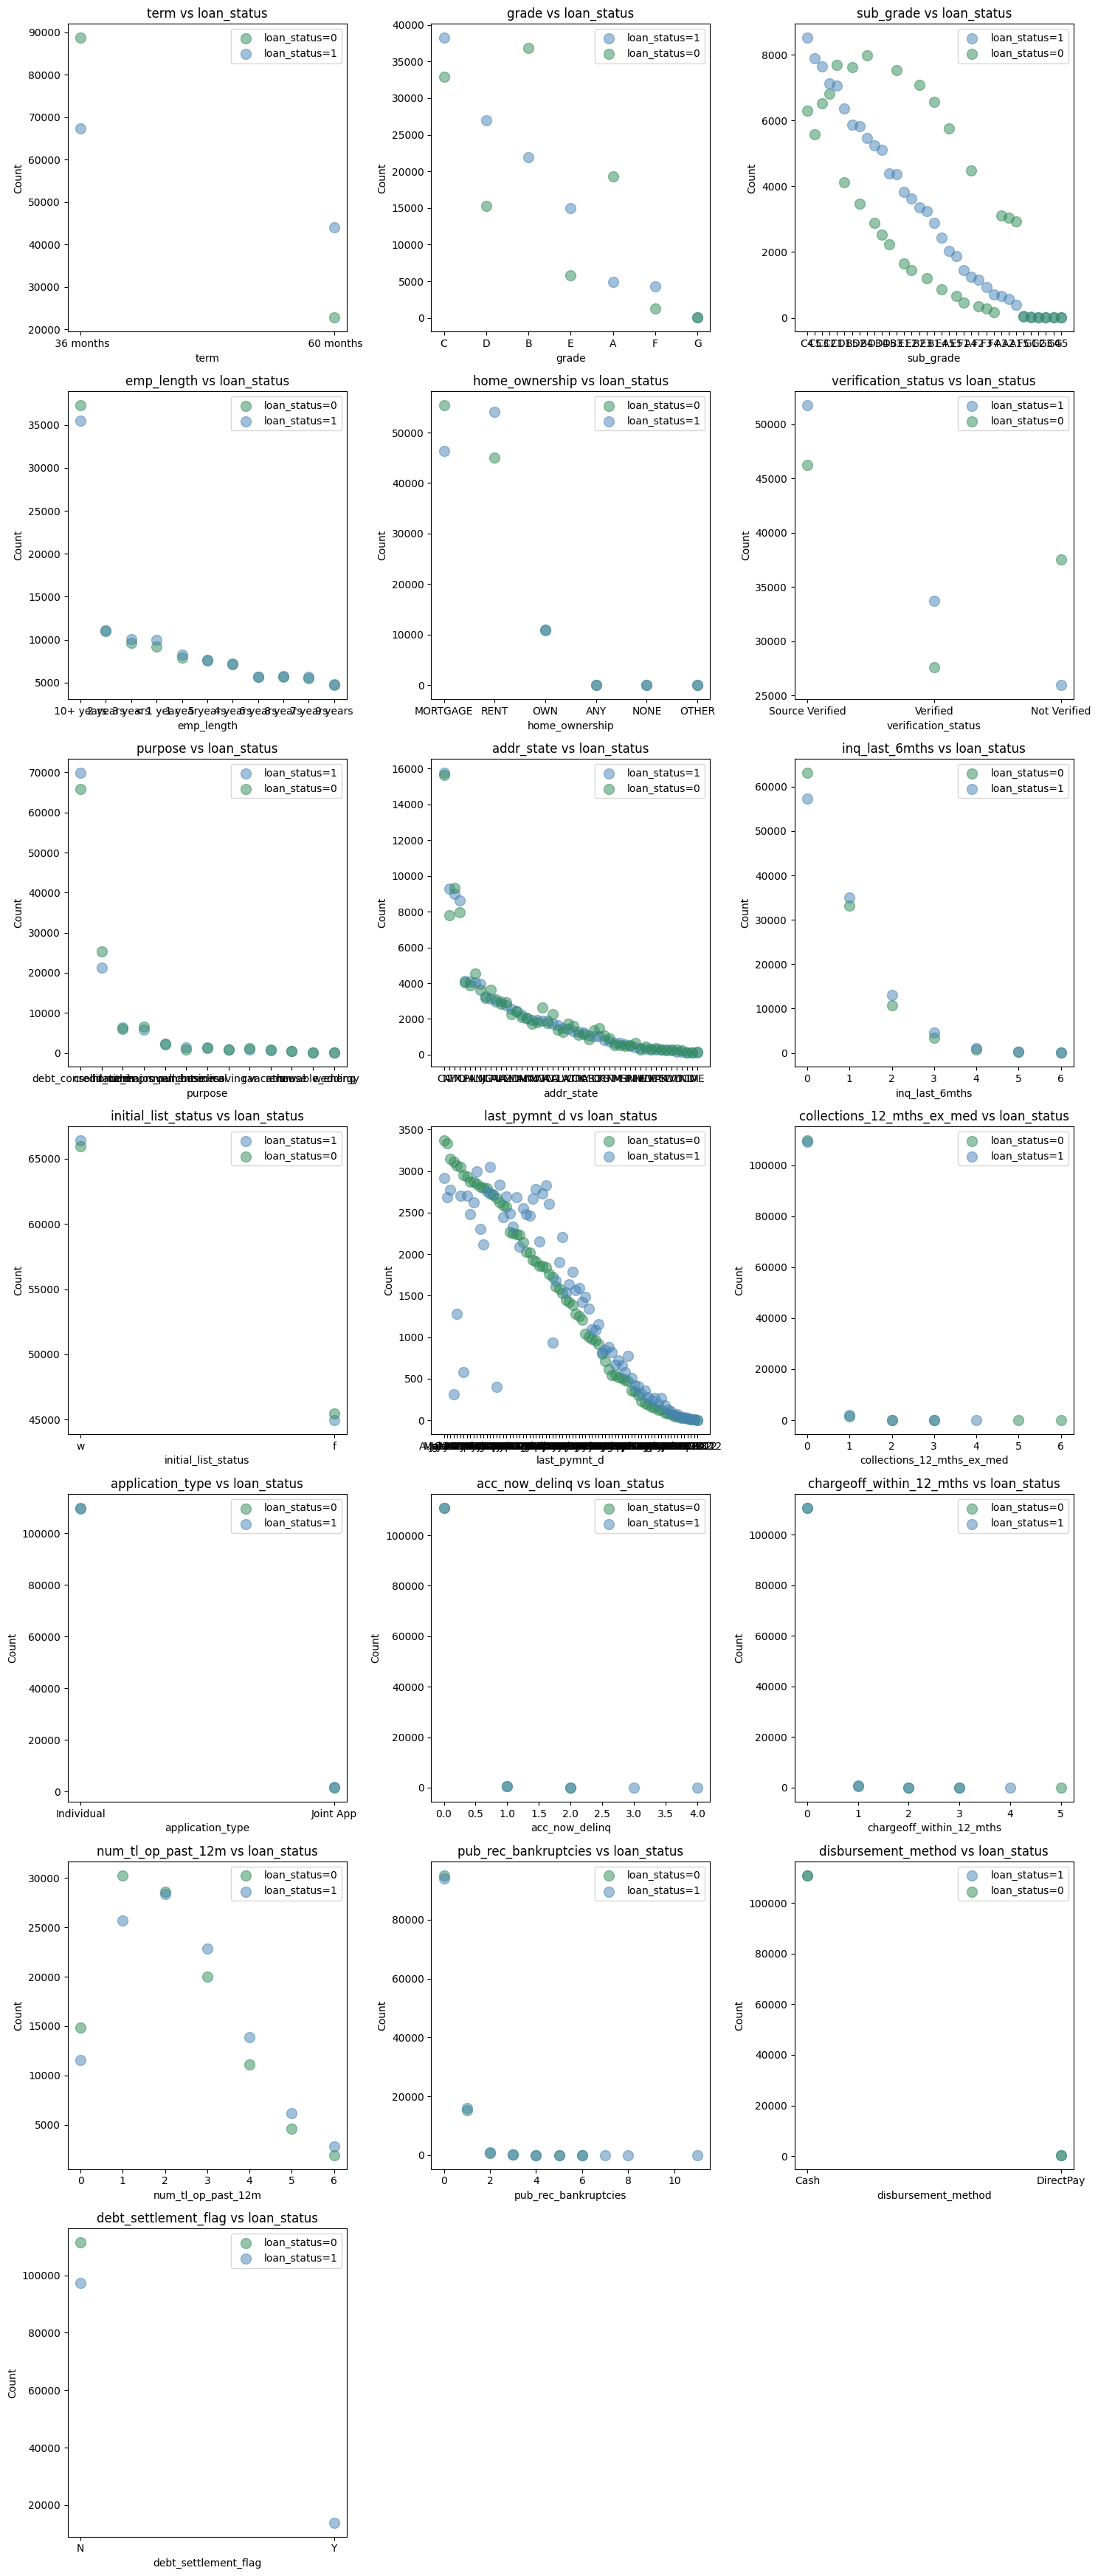

In [125]:
# Let's assume loan_status is the target variable
target_variable = 'loan_status'

# Selecting categorical variables
categorical_vars = df4.select_dtypes(include=['object']).columns

# Calculate the number of rows and columns for subplots
num_plots = len(categorical_vars)
num_cols = 3  # You can change the number of columns as per your preference
num_rows = (num_plots - 1) // num_cols + 1

# Set up the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Define colors for target variable values
colors = {0: 'seagreen', 1: 'steelblue'}

# Plot each categorical variable
for i, cat_var in enumerate(categorical_vars):
    # Create a DataFrame for plotting
    plot_data = df4[[cat_var, target_variable]].value_counts().reset_index(name='count')
    # Scatter plot
    for val in plot_data[target_variable].unique():
        data = plot_data[plot_data[target_variable] == val]
        axes[i].scatter(data[cat_var], data['count'], color=colors[val], label=f"{target_variable}={val}", s=100, alpha=0.5)
    axes[i].set_title(cat_var + " vs " + target_variable)
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel("Count")
    axes[i].legend()

# Hide any empty subplots
for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

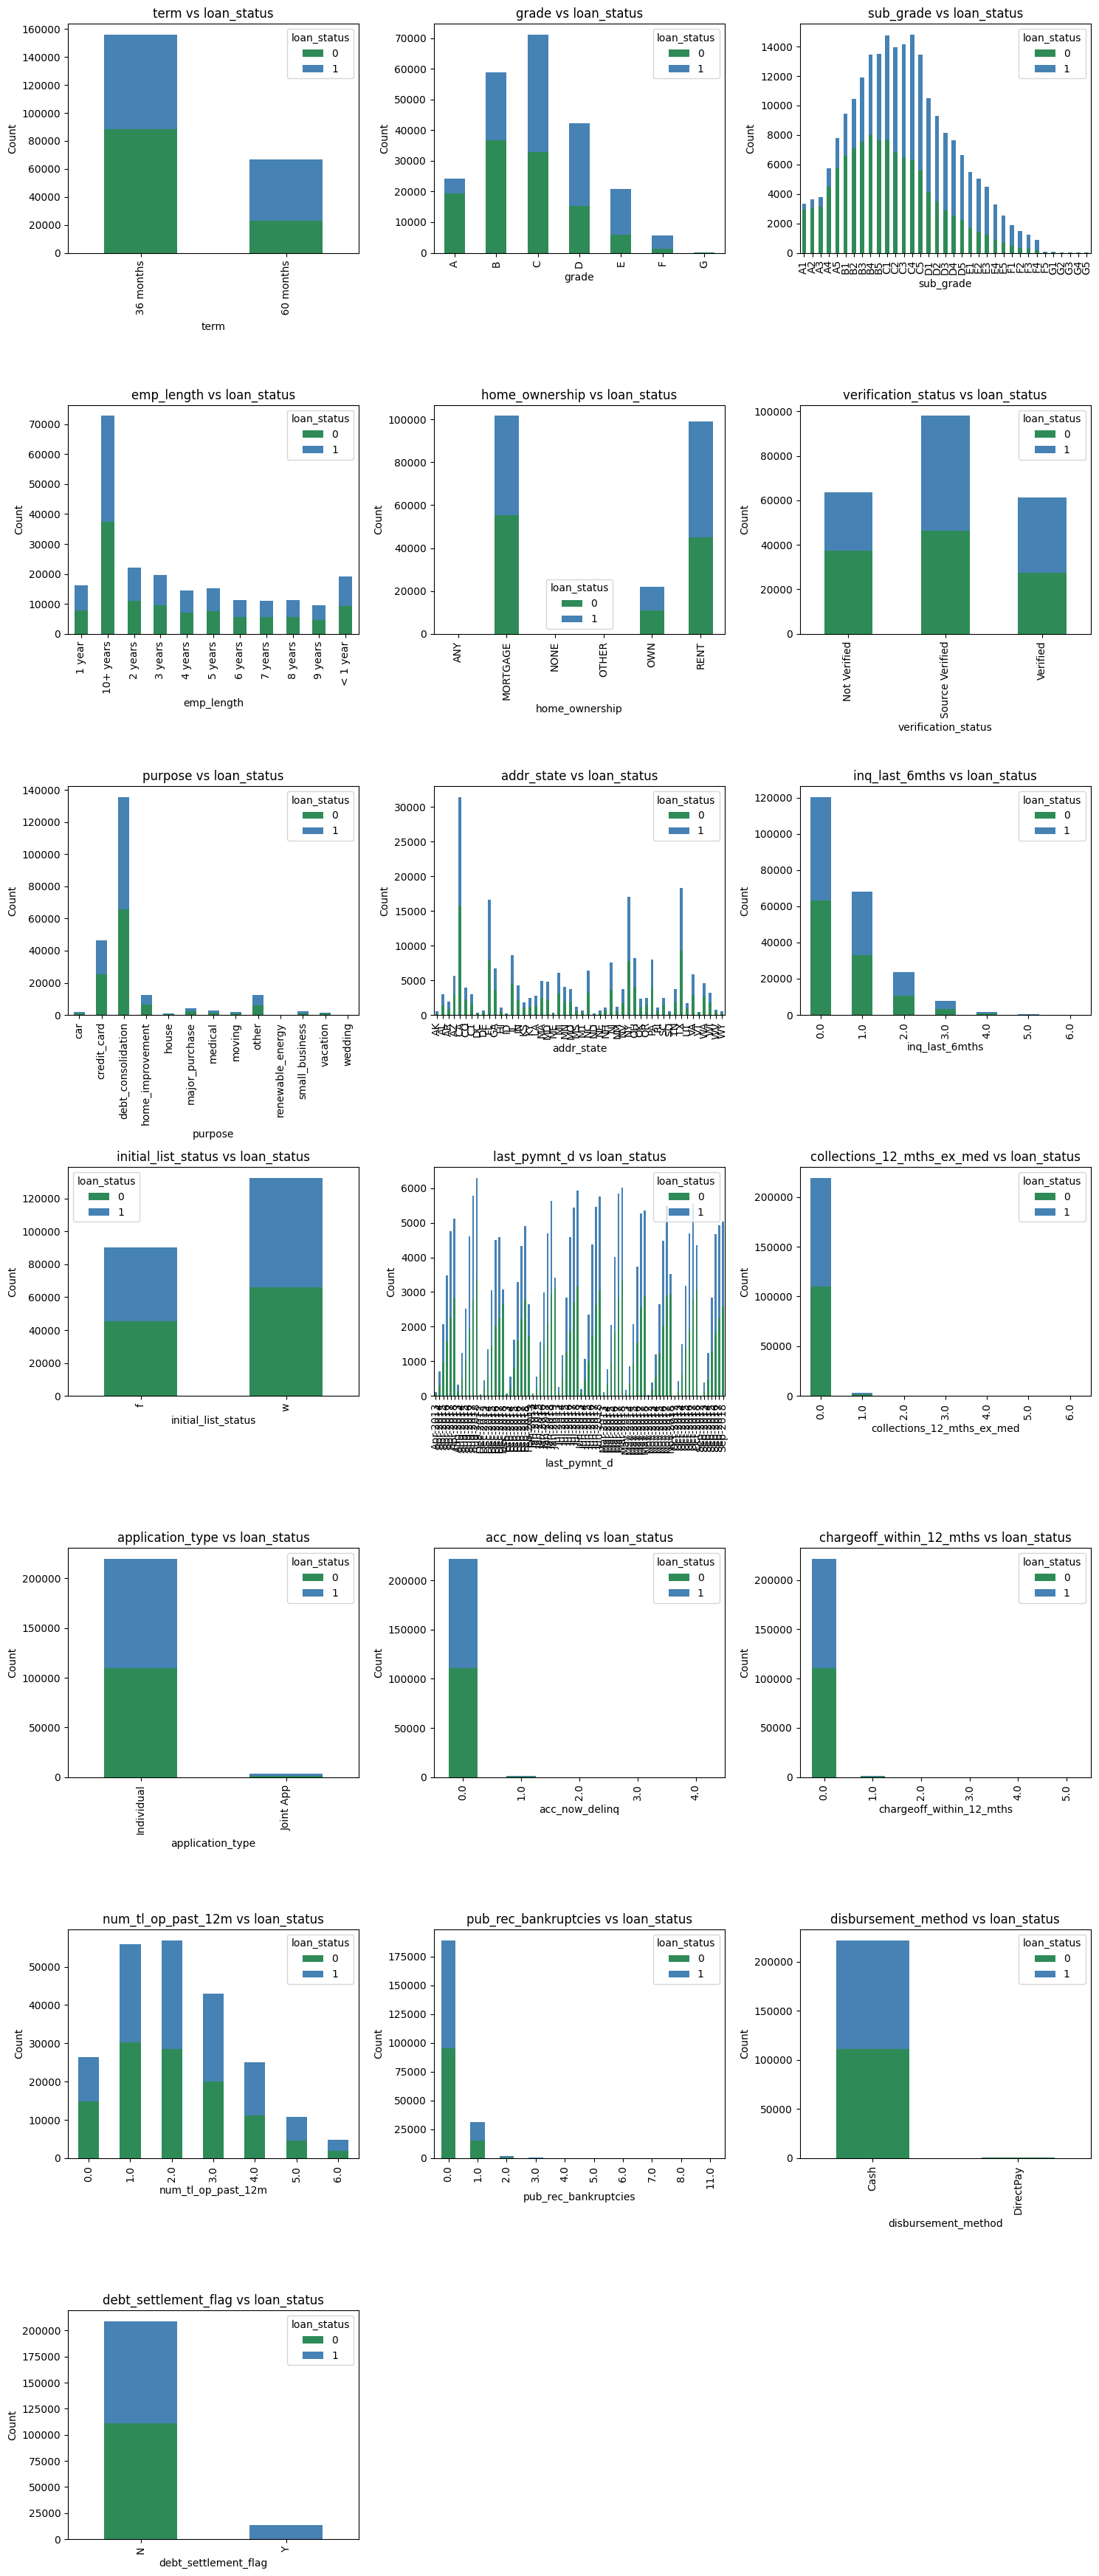

In [126]:
target_variable = 'loan_status'

# Selecting categorical variables
categorical_vars = df4.select_dtypes(include=['object']).columns

# Calculate the number of rows and columns for subplots
num_plots = len(categorical_vars)
num_cols = 3  # You can change the number of columns as per your preference
num_rows = (num_plots - 1) // num_cols + 1

# Set up the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Define colors for target variable values
colors = {0: 'seagreen', 1: 'steelblue'}

# Plot each categorical variable
for i, cat_var in enumerate(categorical_vars):
    # Create a DataFrame for plotting
    plot_data = df4[[cat_var, target_variable]].value_counts().unstack().fillna(0)
    # Count plot
    plot_data.plot(kind='bar', stacked=True, color=[colors[col] for col in plot_data.columns], ax=axes[i])
    axes[i].set_title(cat_var + " vs " + target_variable)
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel("Count")
    axes[i].legend(title=target_variable)

# Hide any empty subplots
for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### Term and loan_status

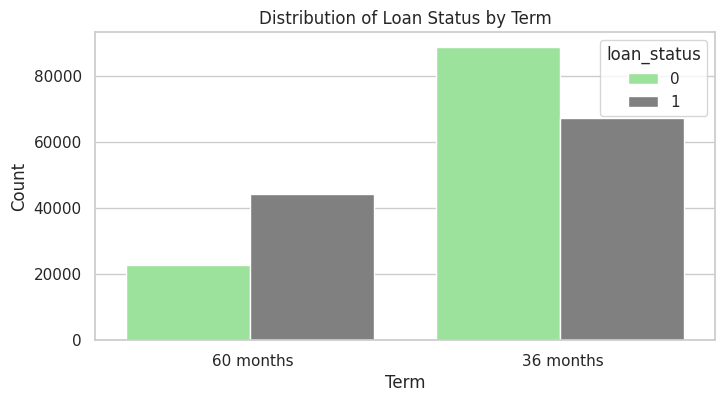

In [127]:
#Set the style of the plot
sns.set(style="whitegrid")

#Create the bar plot
plt.figure(figsize=(8, 4))
sns.countplot(x='term', hue='loan_status', data=df4, palette = ['lightgreen', 'grey'])

#Set the title and labels
plt.title('Distribution of Loan Status by Term')
plt.xlabel('Term')
plt.ylabel('Count')

plt.show()

#### The term feature should likely be kept in the model since it could be a significant predictor of loan status. The clear difference in outcomes between the two terms suggests that term length influences the likelihood of a loan being fully paid or charged off.

### Grade and Sub_grade with loan_status

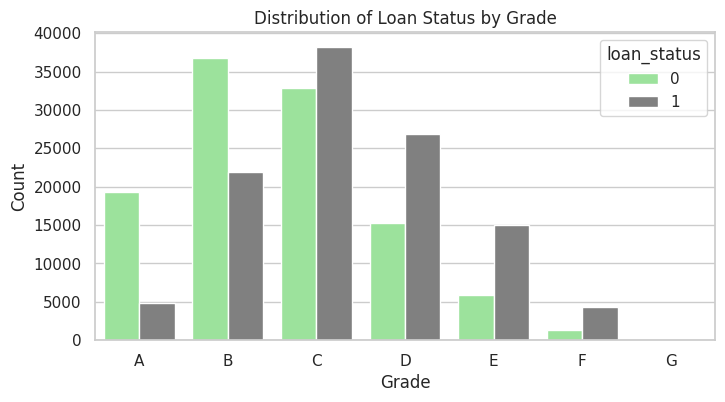

In [128]:
#Bar chart for grade
plt.figure(figsize=(8, 4))
sns.countplot(x='grade', hue='loan_status', data=df4, palette = ['lightgreen', 'grey'], order=sorted(df4['grade'].unique()))

#Set the title and labels
plt.title('Distribution of Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.show()

In [129]:
df4['grade'].value_counts()

grade
C    71107
B    58745
D    42164
A    24199
E    20835
F     5591
G      107
Name: count, dtype: int64

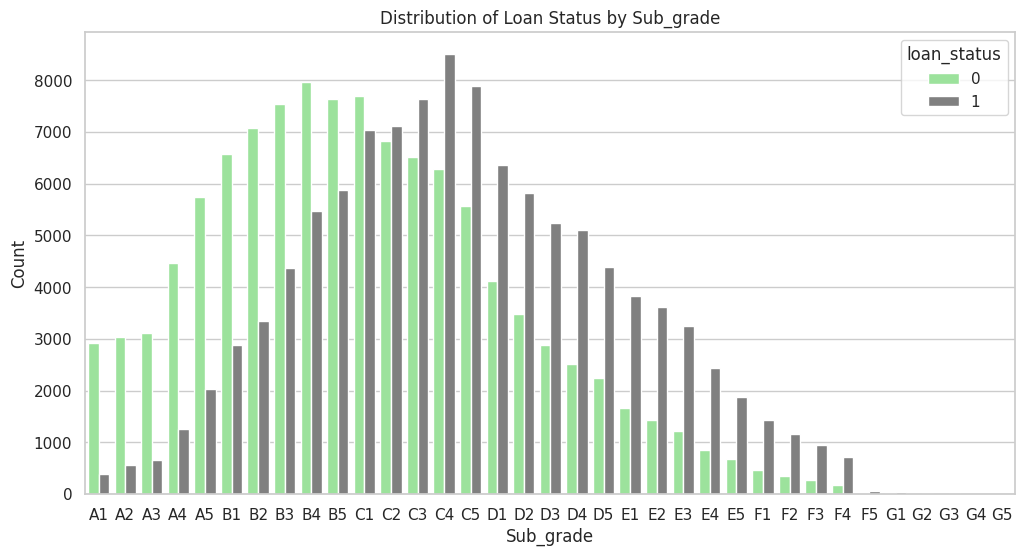

In [130]:
#sub_grade
plt.figure(figsize=(12, 6))
sns.countplot(x='sub_grade', hue='loan_status', data=df4, palette = ['lightgreen', 'grey'], 
              order=sorted(df4['sub_grade'].unique()))

#Set the title and labels
plt.title('Distribution of Loan Status by Sub_grade')
plt.xlabel('Sub_grade')
plt.ylabel('Count')

plt.show()

#### We do not require both 'Grade' and 'Sub_grade' since they convey similar information about the loan grading. Additionally, we will consolidate the 'F' and 'G' grades into 'E', and subsequently rename this combined category to 'E_FG'.

#### Both 'Grade' and 'Sub_grade' appear to be important features for predicting loan default and should be considered for inclusion in the predictive model. They show a clear differentiation in loan performance, which is valuable for risk assessment.

In [131]:
#Combine 'F' and 'G' grades into 'E'
df4['grade'] = df4['grade'].replace(['F', 'G'], 'E')

#Rename 'E' to 'E_FG'
df4['grade'] = df4['grade'].replace('E', 'E_FG')

In [132]:
#Drop sub_grade column
df4.drop(columns=['sub_grade'], inplace=True)

### emp_length and loan_status

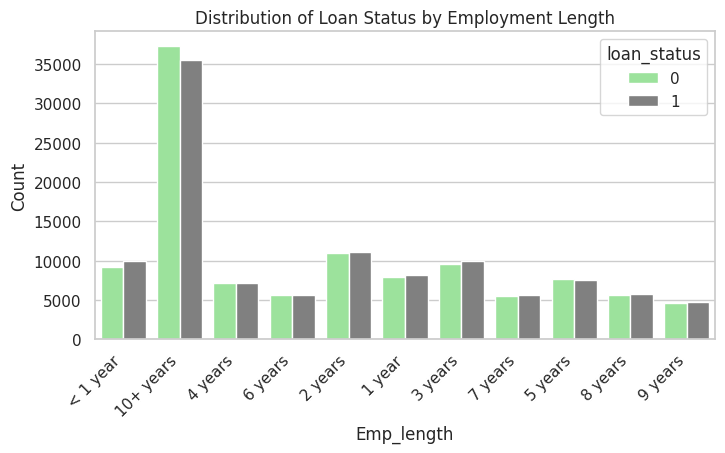

In [133]:
#Create the bar plot
plt.figure(figsize=(8, 4))
sns.countplot(x='emp_length', hue='loan_status', data=df4, palette = ['lightgreen', 'grey'])

#Set the title and labels
plt.title('Distribution of Loan Status by Employment Length')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Emp_length')
plt.ylabel('Count')

plt.show()

In [134]:
for year in df4.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{df4[df4.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

< 1 year years in this position:
loan_status
1   0.52
0   0.48
Name: proportion, dtype: float64
10+ years years in this position:
loan_status
0   0.51
1   0.49
Name: proportion, dtype: float64
4 years years in this position:
loan_status
1   0.50
0   0.50
Name: proportion, dtype: float64
6 years years in this position:
loan_status
1   0.50
0   0.50
Name: proportion, dtype: float64
2 years years in this position:
loan_status
1   0.50
0   0.50
Name: proportion, dtype: float64
1 year years in this position:
loan_status
1   0.51
0   0.49
Name: proportion, dtype: float64
3 years years in this position:
loan_status
1   0.51
0   0.49
Name: proportion, dtype: float64
7 years years in this position:
loan_status
1   0.51
0   0.49
Name: proportion, dtype: float64
5 years years in this position:
loan_status
0   0.50
1   0.50
Name: proportion, dtype: float64
8 years years in this position:
loan_status
1   0.51
0   0.49
Name: proportion, dtype: float64
9 years years in this position:
loan_status
1   

#### The 10+ years category has the highest count for both 'Fully Paid' and 'Charged Off' loans. This suggests that a significant portion of the loan applicants are those who have been employed for a longer duration. However, both fully paid and charge off rates are extremely similar across all employment lengths. So we are going to drop the emp_length column.

In [135]:
#Drop emp_length column
df4.drop(columns=['emp_length'], inplace=True)

### home_ownership and loan_status

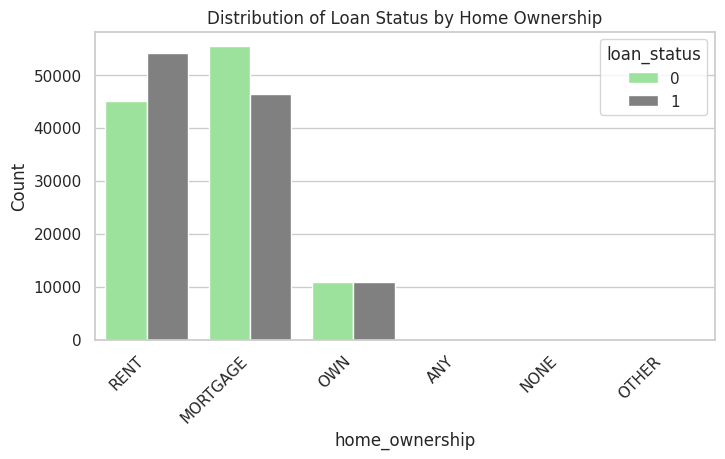

In [136]:
#Create the bar plot
plt.figure(figsize=(8, 4))
sns.countplot(x='home_ownership', hue='loan_status', palette = ['lightgreen', 'grey'], data=df4)

#Set the title and labels
plt.title('Distribution of Loan Status by Home Ownership')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('home_ownership')
plt.ylabel('Count')

plt.show()

In [137]:
df4['home_ownership'].value_counts()

home_ownership
MORTGAGE    101686
RENT         99173
OWN          21823
ANY             43
OTHER           12
NONE            11
Name: count, dtype: int64

#### MORTGAGE and RENT are the most common categories in home ownership status, with MORTGAGE being the most frequent. This suggests that most borrowers either have a mortgage or rent their home. OWN is less common than MORTGAGE and RENT, but still represents a significant number of borrowers. Since there aren't too many values in ANY, NONE, OTHER, we will drop these classes.

In [138]:
#Drop ANY, NONE, OTHER classes
df4 = df4[~df4['home_ownership'].isin(['ANY', 'NONE', 'OTHER'])]

### purpose and loan_status

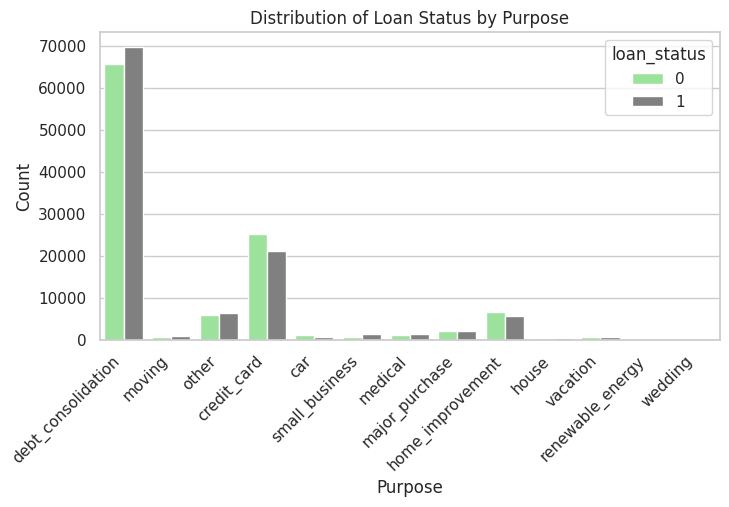

In [139]:
#Create bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='purpose', hue='loan_status', data=df4, palette = ['lightgreen', 'grey'])

#Set the title and labels
plt.title('Distribution of Loan Status by Purpose')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Purpose')
plt.ylabel('Count')

plt.show()

In [140]:
df4['purpose'].value_counts()

purpose
debt_consolidation    135629
credit_card            46607
home_improvement       12397
other                  12351
major_purchase          4394
medical                 2565
small_business          2181
car                     1997
moving                  1686
vacation                1487
house                   1079
wedding                  167
renewable_energy         142
Name: count, dtype: int64

#### Upon reviewing the 'purpose' variable, it was observed that the majority of observations fell into categories such as DEBT CONSOLIDATION, CREDIT CARD, and HOME IMPROVEMENT, while other categories had significantly fewer observations. To simplify the analysis, only the top four categories were retained, and all other categories were grouped into a single category labeled 'Other.' This approach is commonly used to handle categorical variables with numerous categories. 

In [141]:
#Since the primary reasons for obtaining a loan are for debt consolidation, credit card, home improvement, and other unspecified
#purposes, we will reclassify the remaining categories under a general 'other' category.

#List of categories to keep
categories_to_keep = ['debt_consolidation', 'credit_card', 'home_improvement']

#Reclassify all other categories into 'other'
df4['purpose'] = df4['purpose'].apply(lambda x: x if x in categories_to_keep else 'other')

### loan and addr_state

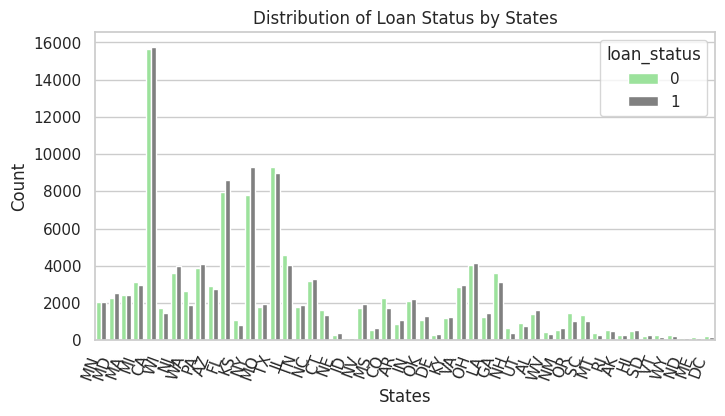

In [142]:
#Create bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='addr_state', hue='loan_status', data=df4, palette = ['lightgreen', 'grey'])

#Set the title and labels
plt.title('Distribution of Loan Status by States')
plt.xticks(rotation=45, ha='right')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation=70)

plt.show()

In [143]:
df4['addr_state'].value_counts()

addr_state
CA    31428
TX    18324
NY    17082
FL    16575
IL     8605
OH     8154
PA     7969
NJ     7579
GA     6752
NC     6446
MI     6084
VA     5815
AZ     5688
MA     4849
MD     4789
WA     4560
IN     4302
MN     4099
CO     3993
MO     3738
NV     3687
TN     3687
WI     3174
AL     3029
CT     2948
LA     2729
OR     2496
KY     2421
SC     2408
OK     2375
AR     1903
KS     1865
UT     1672
NM     1211
MS     1207
NH     1058
HI     1056
RI     1020
WV      764
NE      673
MT      656
DE      608
AK      548
SD      523
WY      513
VT      438
DC      376
ME      288
ID      259
ND      259
Name: count, dtype: int64

### inq_last_6_mths and loan_staus

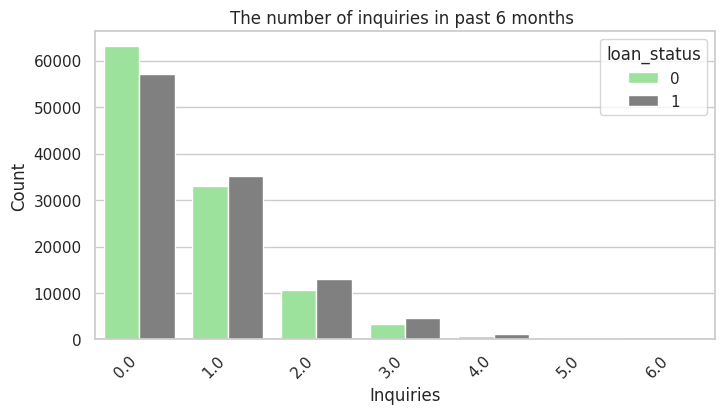

In [144]:
#Create bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='inq_last_6mths', hue='loan_status', data=df4, palette = ['lightgreen', 'grey'])

#Set the title and labels
plt.title('The number of inquiries in past 6 months ')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Inquiries')
plt.ylabel('Count')

plt.show()

In [145]:
#Create a mapping dictionary
category_mapping = {
    0.0: 'none',
    1.0: 'one',
    2.0: 'two',
    3.0: 'three',
    4.0: 'four',
    5.0: 'five',
    6.0: 'six'
}

# Replace the integer values with string labels
df4['inq_last_6mths'] = df4['inq_last_6mths'].replace(category_mapping)

In [146]:
df4['inq_last_6mths'].value_counts()

inq_last_6mths
none     120338
one       68196
two       23693
three      7935
four       1845
five        541
six         134
Name: count, dtype: int64

In [147]:
#Combine 3, 4, 5, 6 categories into 2
df4['inq_last_6mths'] = df4['inq_last_6mths'].replace(['three', 'four', 'five', 'six'], 'two')

#Rename 2 to gt_2
df4['inq_last_6mths'] = df4['inq_last_6mths'].replace('two', 'two_or_more')

### collections_12_mths_ex_med and loan_staus

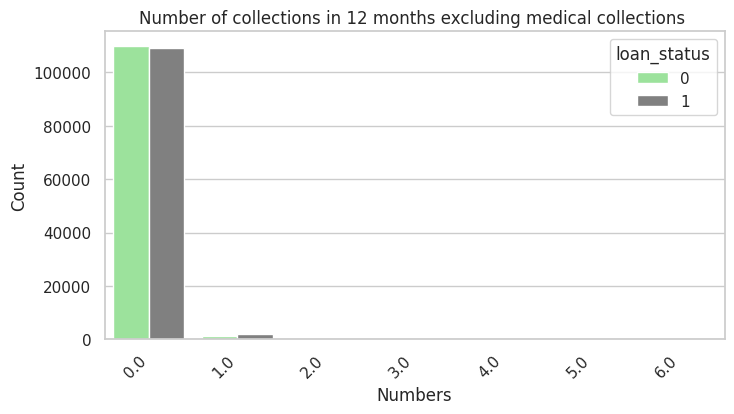

In [148]:
#Create bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='collections_12_mths_ex_med', hue='loan_status', data=df4, palette = ['lightgreen', 'grey'])

#Set the title and labels
plt.title('Number of collections in 12 months excluding medical collections ')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Numbers')
plt.ylabel('Count')

plt.show()

In [149]:
#Drop it
df4.drop(columns = ['collections_12_mths_ex_med'], inplace = True)

### acc_now_delinq and loan_staus

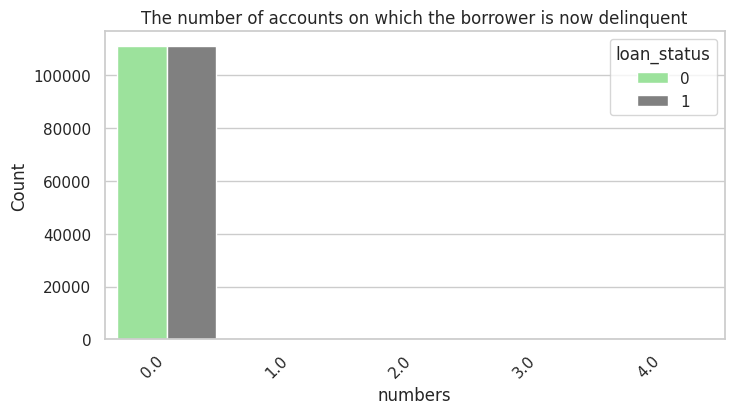

In [150]:
#Create bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='acc_now_delinq', hue='loan_status', data=df4, palette = ['lightgreen', 'grey'])

#Set the title and labels
plt.title('The number of accounts on which the borrower is now delinquent')
plt.xticks(rotation=45, ha='right')
plt.xlabel('numbers')
plt.ylabel('Count')

plt.show()

In [151]:
#Drop it
df4.drop(columns = ['acc_now_delinq'], inplace = True)

### chargeoff_within_12_mths and loan_staus

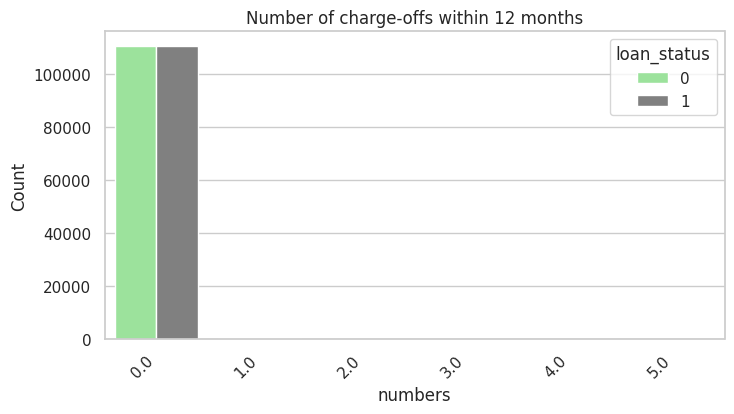

In [152]:
#Create bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='chargeoff_within_12_mths', hue='loan_status', data=df4, palette = ['lightgreen', 'grey'])

#Set the title and labels
plt.title('Number of charge-offs within 12 months')
plt.xticks(rotation=45, ha='right')
plt.xlabel('numbers')
plt.ylabel('Count')

plt.show()

In [153]:
#Drop it
df4.drop(columns = ['chargeoff_within_12_mths'], inplace = True)

### num_tl_op_past_12m and loan_staus

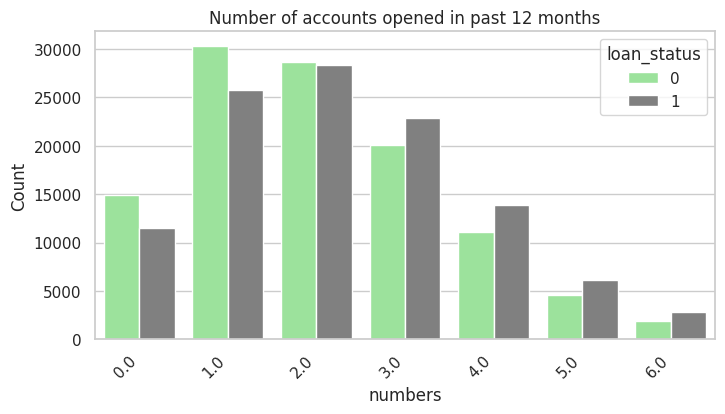

In [154]:
#Create bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='num_tl_op_past_12m', hue='loan_status', data=df4, palette = ['lightgreen', 'grey'])

#Set the title and labels
plt.title('Number of accounts opened in past 12 months')
plt.xticks(rotation=45, ha='right')
plt.xlabel('numbers')
plt.ylabel('Count')

plt.show()

In [155]:
df4['num_tl_op_past_12m'].value_counts()

num_tl_op_past_12m
2.00    56933
1.00    55963
3.00    42896
0.00    26414
4.00    24970
5.00    10762
6.00     4744
Name: count, dtype: int64

In [156]:
#Relabel each category
#Create a mapping dictionary
category_mapping1 = {
    0.0: 'none',
    1.0: 'one',
    2.0: 'two',
    3.0: 'three',
    4.0: 'four',
    5.0: 'five',
    6.0: 'six'
}

# Replace the integer values with string labels
df4['num_tl_op_past_12m'] = df4['num_tl_op_past_12m'].replace(category_mapping1)

### pub_rec_bankruptcies and loan_status

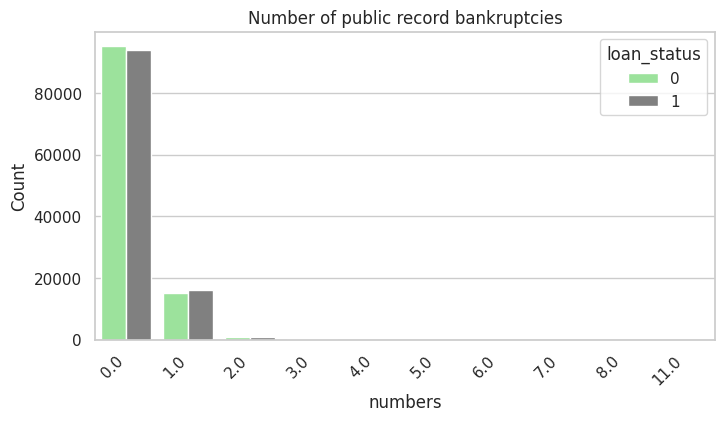

In [157]:
#Create bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status', data=df4, palette = ['lightgreen', 'grey'])

#Set the title and labels
plt.title('Number of public record bankruptcies')
plt.xticks(rotation=45, ha='right')
plt.xlabel('numbers')
plt.ylabel('Count')

plt.show()

In [158]:
df4['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.00     189079
1.00      31237
2.00       1841
3.00        378
4.00         93
5.00         38
6.00         11
7.00          3
8.00          1
11.00         1
Name: count, dtype: int64

In [159]:
#Create a mapping dictionary
category_mapping = {
    0.0: 'none',
    1.0: 'one',
}
# Replace the integer values with string labels
df4['pub_rec_bankruptcies'] = df4['pub_rec_bankruptcies'].replace(category_mapping)

In [160]:
#Only keep vaule 'none' and 'one'
df4 = df4[df4['pub_rec_bankruptcies'].isin(['none', 'one'])]

### Bar charts for the rest category variabels

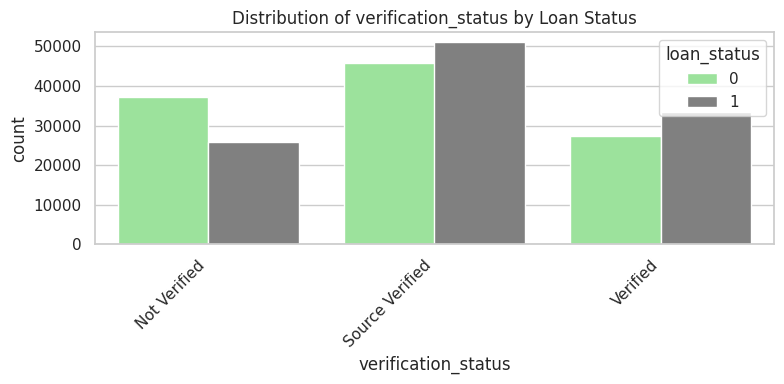

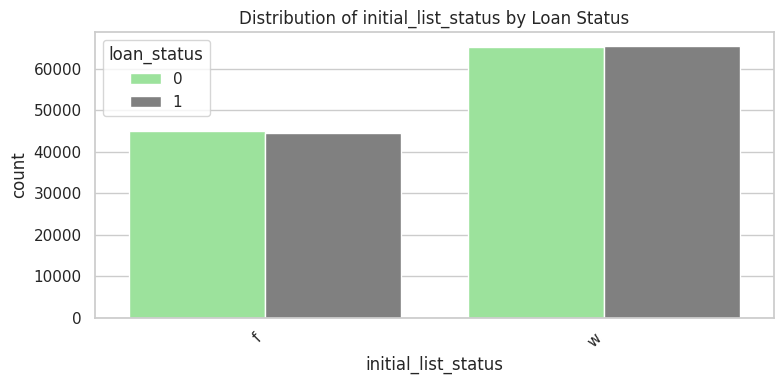

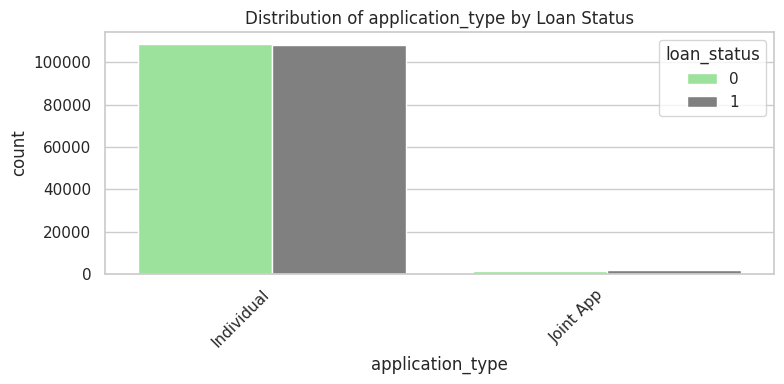

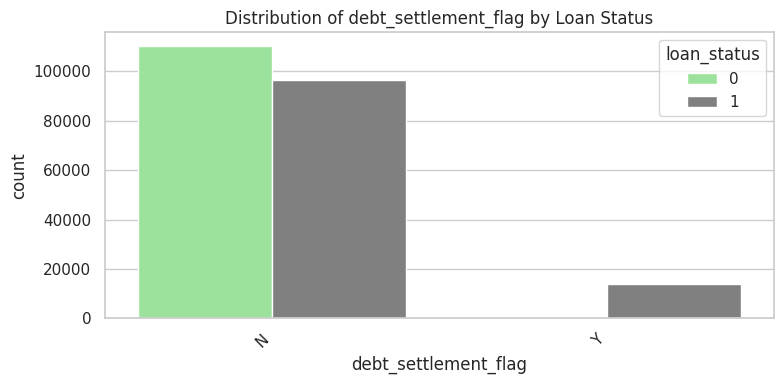

In [161]:
#Bar charts
cat = ['verification_status', 'initial_list_status', 'application_type', 'disbursement_method', 'debt_settlement_flag' ] 

for column in cat:
    plt.figure(figsize=(8, 4))  
    sns.countplot(x=column, hue='loan_status', data=df4, palette = ['lightgreen', 'grey'])  
    plt.title(f'Distribution of {column} by Loan Status')  
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()  
    plt.show()

#### The features like 'application_type', 'disbursement_method', 'debt_settlement_flagmay' may not provide much predictive power because there is little variation for a model to learn from. So, we will be dropping them.

In [162]:
#Drop columns
df4.drop(columns=['application_type', 'disbursement_method', 'debt_settlement_flag'], inplace=True)

In [163]:
#Check 
df4.shape   #It was (222748, 67)

(220316, 51)

# Feature Engineering

## New Features

### Date- Extract year ('last_pymnt_d')

In [164]:
df4['last_pymnt_d'].unique()

array(['Dec-2018', 'Nov-2018', 'Feb-2019', 'Oct-2018', 'Sep-2018',
       'Aug-2018', 'Jan-2019', 'Jul-2018', 'Jun-2018', 'May-2018',
       'Apr-2018', 'Mar-2018', 'Feb-2018', 'Jan-2018', 'Oct-2017',
       'Dec-2017', 'Nov-2017', 'Mar-2017', 'Sep-2017', 'May-2017',
       'Aug-2017', 'Dec-2016', 'Jul-2017', 'Jan-2017', 'Jun-2017',
       'Apr-2017', 'Nov-2016', 'Feb-2017', 'Oct-2016', 'Sep-2016',
       'Aug-2016', 'Jul-2016', 'Jun-2016', 'May-2016', 'Apr-2016',
       'Mar-2016', 'Feb-2016', 'Jan-2016', 'Dec-2015', 'Nov-2015',
       'Oct-2015', 'Sep-2015', 'Aug-2015', 'Jul-2015', 'Jun-2015',
       'May-2015', 'Apr-2015', 'Mar-2015', 'Feb-2015', 'Apr-2014',
       'Dec-2014', 'Mar-2014', 'Jul-2014', 'May-2014', 'Jan-2015',
       'Sep-2014', 'Aug-2014', 'Jun-2014', 'Oct-2014', 'Feb-2014',
       'Nov-2014', 'Jan-2014', 'Dec-2013', 'Nov-2013', 'Oct-2013',
       'Sep-2013', 'Aug-2013', 'Jul-2013', 'Jun-2013', 'May-2013',
       'Apr-2013', 'Mar-2013', 'Feb-2013', 'Jan-2013', 'Dec-20

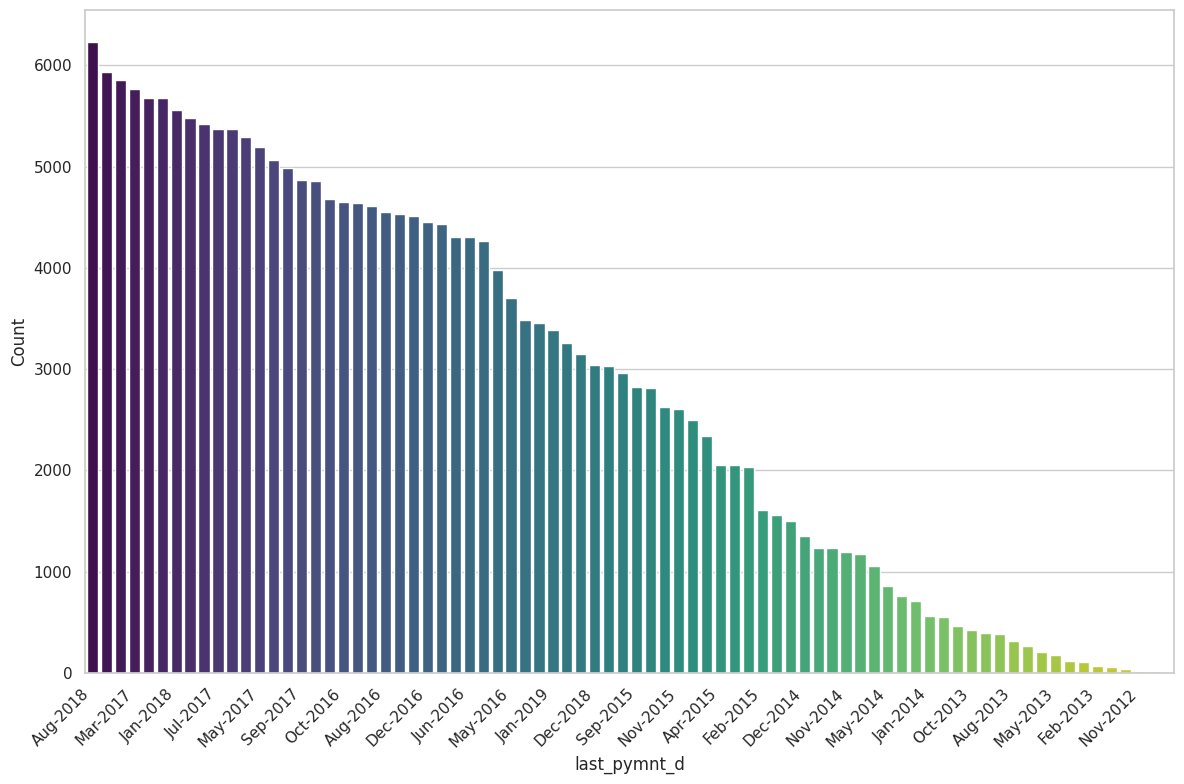

In [165]:
# Count the occurrences of each unique value in the column
value_counts = df4['last_pymnt_d'].value_counts()

# Plot the distribution using seaborn
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')  # Change color palette if needed
plt.xlabel('last_pymnt_d')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability and align them to the right
plt.xticks(range(0, len(value_counts.index), 3), value_counts.index[::3])  # Show every 3rd tick to spread out
plt.tight_layout()  # Adjust layout
plt.show()

In [166]:
#Extract
df4['last_pymnt_d_year'] = pd.to_datetime(df4['last_pymnt_d'], format='%b-%Y').dt.year

counts = df4['last_pymnt_d_year'].value_counts().sort_values(ascending=False)
print(counts)

last_pymnt_d_year
2017    61247
2018    60300
2016    48893
2015    28584
2014    12185
2019     6018
2013     3004
2012       85
Name: count, dtype: int64


#### As observed, the "last_pymnt_d" variable only contains data from January to Febrary in 2019, rendering it insufficient to represent the entire year. Consequently, we opt to exclude January 2019 from our analysis. 
#### Additionally, due to the relatively limited number of observations in 2012 and 2013 compared to other years,  we will focus on the "last_pymnt_d_year" values from 2014 to 2018. 
#### This decision is based on the fact that the last payment date typically indicates whether the loan has been fully paid or charged off. By examining the payments made within this timeframe, we can effectively determine the status of the loan, particularly whether it has defaulted or not.

In [167]:
#Drop orignal last_pymnt_d columns
df4 = df4.drop(columns=['last_pymnt_d'])

In [168]:
df4 = df4[df4['last_pymnt_d_year'].between(2014, 2018)]

In [169]:
#Convert it to categorical(object)
df4['last_pymnt_d_year'] = df4['last_pymnt_d_year'].astype('object')

In [170]:
#See what categorical variables look like
df4.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    5
home_ownership           3
verification_status      3
purpose                  4
addr_state              50
inq_last_6mths           3
initial_list_status      2
num_tl_op_past_12m       7
pub_rec_bankruptcies     2
last_pymnt_d_year        5
dtype: int64

## Modified Features

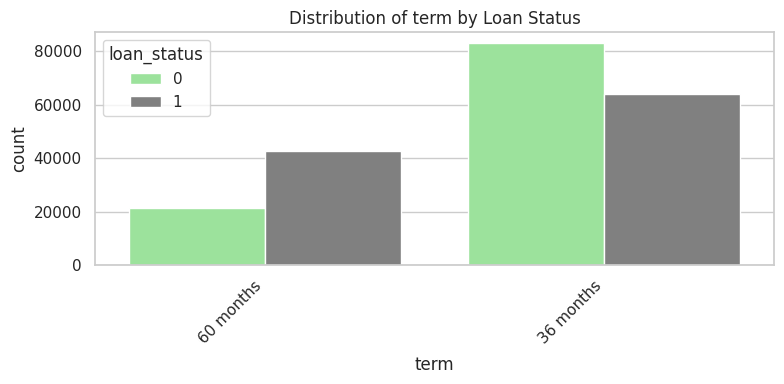

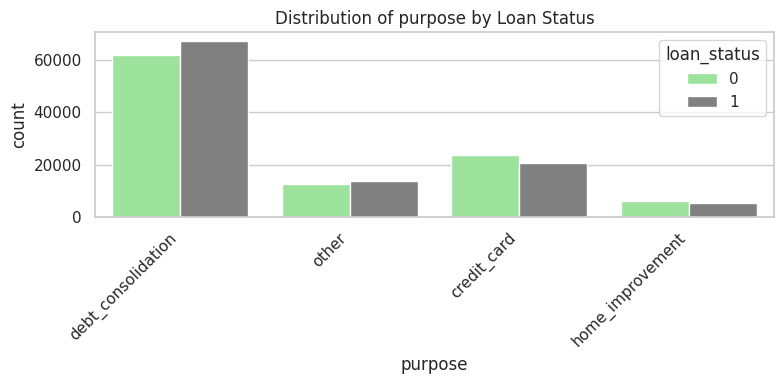

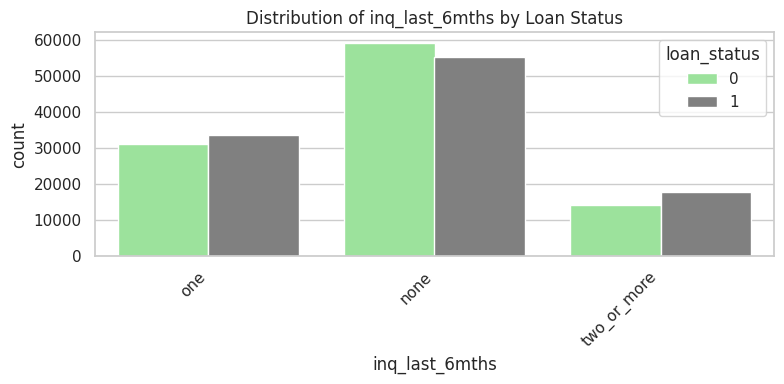

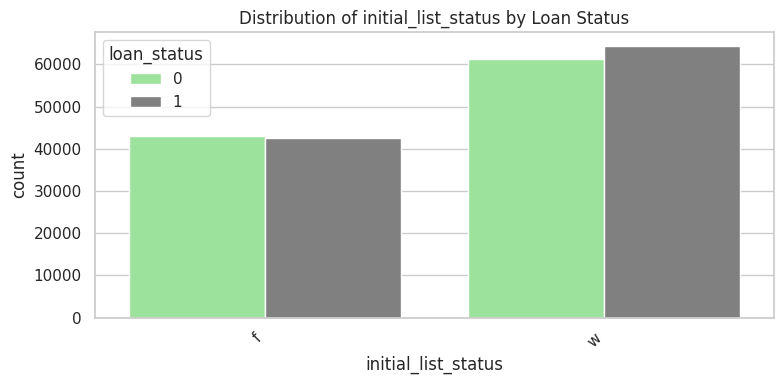

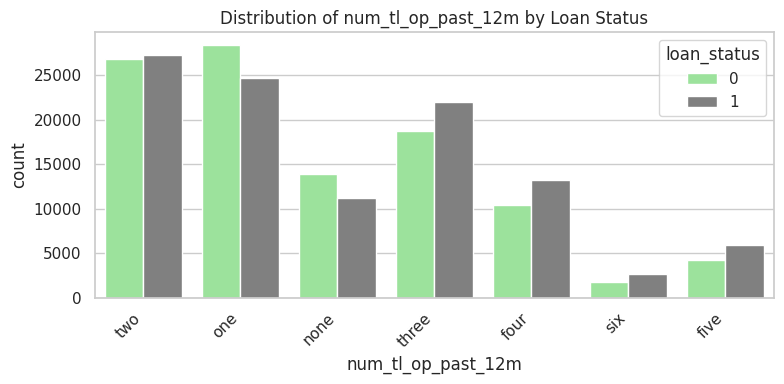

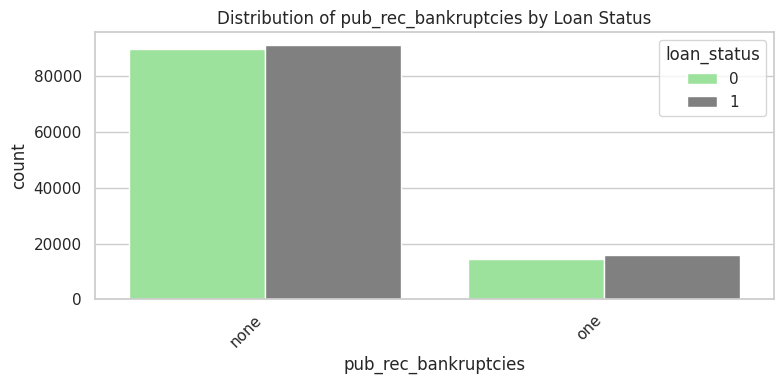

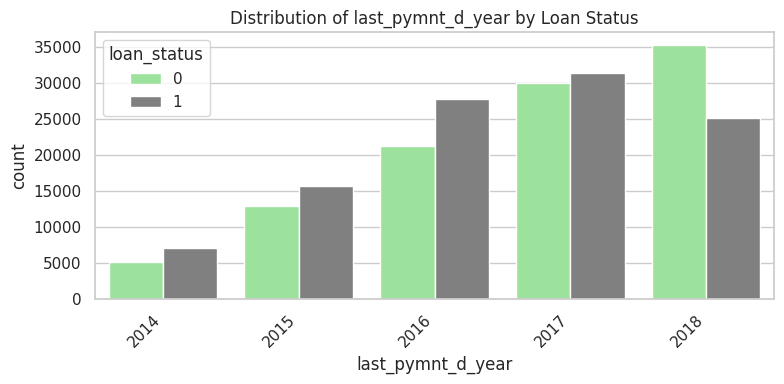

In [171]:
#Bar charts
cat1 = df4.select_dtypes(include='object')

for column in cat1:
    plt.figure(figsize=(8, 4))  
    sns.countplot(x=column, hue='loan_status', data=df4, palette = ['lightgreen', 'grey'])  
    plt.title(f'Distribution of {column} by Loan Status')  
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()  
    plt.show()

## One-hot encoding

In [172]:
#One-hot encoding
cat1_dummies = pd.get_dummies(cat1)
#Drop original categorical columns
df4_encoded = df4.drop(cat1.columns, axis=1)

df4 = pd.concat([df4_encoded, cat1_dummies], axis=1)

In [173]:
df4.shape   #It was (220316, 51)

(211209, 126)

In [174]:
#Check dataset see if we have successfully done one-hot encoding
df4.head(5)

loan_amnt  int_rate  installment  annual_inc   dti  open_acc  \
67928       16000     10.08       340.59    45000.00 25.52     10.00   
68761       25000      6.46       765.77    83200.00 28.54     16.00   
107165      11450     15.02       397.04    59840.00 16.06      4.00   
120494       6000     18.94       219.76    36000.00 25.97      8.00   
129581      22800     22.35       634.26   100000.00 30.74      9.00   

        revol_util  total_acc  out_prncp  total_pymnt  ...  \
67928        19.50      14.00       0.00       481.63  ...   
68761        56.50      30.00       0.00       756.80  ...   
107165       66.30       8.00       0.00     10763.00  ...   
120494       37.30      15.00       0.00       423.74  ...   
129581       94.10      18.00       0.00      1211.90  ...   

        num_tl_op_past_12m_six  num_tl_op_past_12m_three  \
67928                    False                     False   
68761                    False                     False   
107165                   False                     False   
120494                   False                      True   
129581                   False                     False   

        num_tl_op_past_12m_two  pub_rec_bankruptcies_none  \
67928                     True                       True   
68761                    False                       True   
107165                   False                       True   
120494                   False                      False   
129581                    True                       True   

        pub_rec_bankruptcies_one  last_pymnt_d_year_2014  \
67928                      False                   False   
68761                      False                   False   
107165                     False                   False   
120494                      True                   False   
129581                     False                   False   

        last_pymnt_d_year_2015  last_pymnt_d_year_2016  \
67928                    False                   False   
68761                    False                   False   
107165                   False                   False   
120494                   False                   False   
129581                   False                   False   

        last_pymnt_d_year_2017  last_pymnt_d_year_2018  
67928                    False                    True  
68761                    False                    True  
107165                   False                    True  
120494                   False                    True  
129581                   False                    True  

[5 rows x 126 columns]

In [175]:
###########Make a copy 
df5 = df4.copy()

# Feature Selection

## Correlations matrix

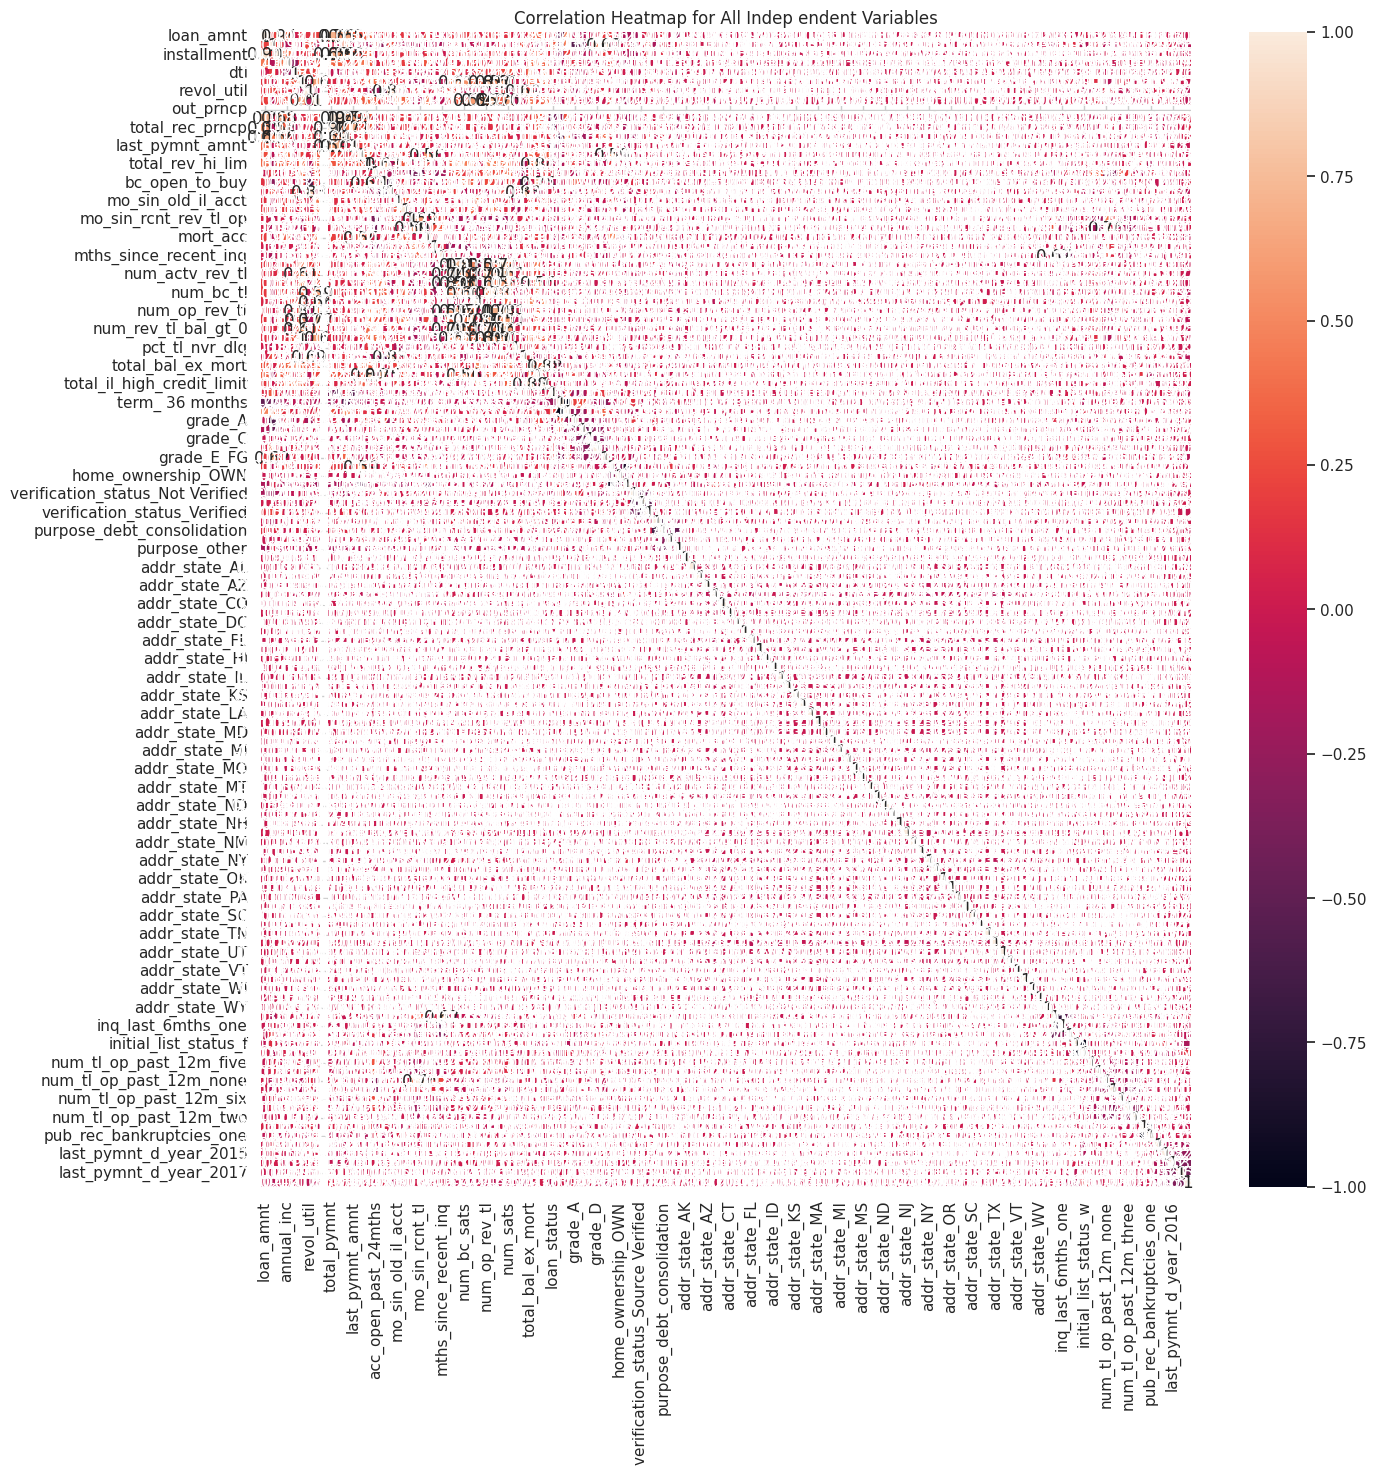

In [176]:
corr=df4.corr()
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

# Set the title
plt.title('Correlation Heatmap for All Indep endent Variables')

# Show the plot
plt.show()

In [177]:
#Define the threshold
threshold = 0.75  

#Find features that are highly correlated (absolute value)
highly_correlated_pairs = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)): 
        if abs(corr.iloc[i, j]) > threshold:
            col1 = corr.columns[i]
            col2 = corr.columns[j]
            highly_correlated_pairs.append((col1, col2, corr.iloc[i, j]))

#Print out highly correlated pairs with their correlation coefficient
for col1, col2, corr_value in highly_correlated_pairs:
    print(f"{col1} and {col2} have a correlation of {corr_value:.2f}")

loan_amnt and installment have a correlation of 0.94
open_acc and num_op_rev_tl have a correlation of 0.81
open_acc and num_sats have a correlation of 1.00
revol_util and bc_util have a correlation of 0.83
total_acc and num_rev_accts have a correlation of 0.77
total_pymnt and total_rec_prncp have a correlation of 0.94
total_rev_hi_lim and total_bc_limit have a correlation of 0.84
bc_open_to_buy and total_bc_limit have a correlation of 0.75
bc_util and percent_bc_gt_75 have a correlation of 0.83
mo_sin_rcnt_tl and num_tl_op_past_12m_none have a correlation of 0.76
num_actv_bc_tl and num_bc_sats have a correlation of 0.83
num_actv_rev_tl and num_op_rev_tl have a correlation of 0.75
num_actv_rev_tl and num_rev_tl_bal_gt_0 have a correlation of 1.00
num_bc_tl and num_rev_accts have a correlation of 0.78
num_op_rev_tl and num_rev_tl_bal_gt_0 have a correlation of 0.75
num_op_rev_tl and num_sats have a correlation of 0.81
total_bal_ex_mort and total_il_high_credit_limit have a correlation of

## Correlation Analysis with target variable

In [178]:
#Set up threshold
target_variable = 'loan_status'
threshold = 0.2 

#Find features with significant correlation with the target variable
significant_correlations = corr[target_variable].drop(target_variable).where(lambda x: abs(x) > threshold).dropna()

#Print
for feature, corr_value in significant_correlations.items():
    print(f"{feature} and {target_variable} have a correlation of {corr_value:.2f}")

int_rate and loan_status have a correlation of 0.30
total_pymnt and loan_status have a correlation of -0.42
total_rec_prncp and loan_status have a correlation of -0.60
last_pymnt_amnt and loan_status have a correlation of -0.53
term_ 36 months and loan_status have a correlation of -0.21
term_ 60 months and loan_status have a correlation of 0.21
grade_A and loan_status have a correlation of -0.21


In [179]:
#Filter features based on absolute correlation matrix (abs correlation > 0.2)
#We noticed that total_pymnt and loan_status have a correlation of -0.42, but total_rec_prncp and total_pymnt are highly 
#correlated, so we only keep one of them
features = ['int_rate', 'total_rec_prncp', 'last_pymnt_amnt', 'loan_status'] 

#Create a new DataFrame 
df5 = df4[features]

df5.head()

int_rate  total_rec_prncp  last_pymnt_amnt  loan_status
67928      10.08           356.19           490.59            1
68761       6.46           631.19           765.77            1
107165     15.02         10763.00         10763.00            1
120494     18.94           252.09           219.76            1
129581     22.35           423.12           634.26            1

## Correaltion Matrix for selected features

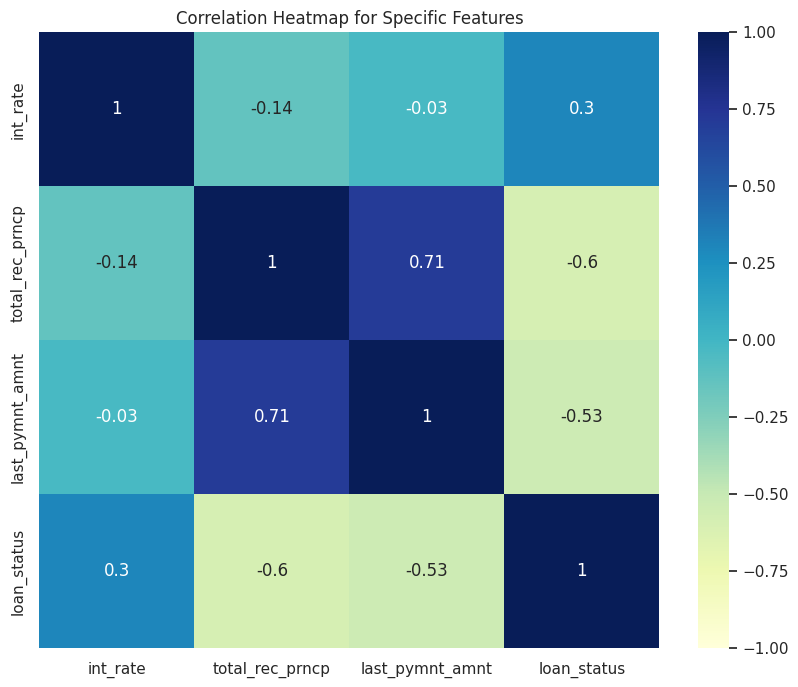

In [180]:
#Calculate the correlation matrix for the selected features
corr_subset = df5.corr()

#Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap_subset = sns.heatmap(corr_subset, vmin=-1, vmax=1, annot=True, cmap= 'YlGnBu')

#Set the title
plt.title('Correlation Heatmap for Specific Features')

#Show the plot
plt.show()

In [181]:
df5.shape    # It was (211209, 126)

(211209, 4)

# Predicting modeling (Logistic Regression, Random Forest, Decision Tree )

## Split data into training and test set
## We will use three features (int_rate, total_rec_prncp, and last_pymnt_amnt)

In [182]:
X = df5.drop('loan_status', axis=1)
y = df5['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

## Train the models

In [183]:
#Create a pipeline that standardizes the data then applies logistic regression
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('logistic', LogisticRegression(max_iter=1000))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(max_iter=1000))])

In [184]:
#Random forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=1234)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1234)

In [185]:
#Decision tree
decision_tree_model = DecisionTreeClassifier(random_state=1234)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)

## Make predictions

In [186]:
#Predict on the test set
y_pred_logistic = pipeline.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_dt = decision_tree_model.predict(X_test)

## Print out coefficients for logistic model

In [187]:
feature_names = X.columns
coefficients = pipeline.named_steps['logistic'].coef_
coef_df = pd.DataFrame(coefficients.flatten(), index=feature_names, columns=['Coefficient'])

print(coef_df)

                 Coefficient
int_rate                0.78
total_rec_prncp        -1.49
last_pymnt_amnt        -7.63


## Evaluate the models

In [188]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     26110
           1       0.84      0.93      0.88     26693

    accuracy                           0.87     52803
   macro avg       0.88      0.87      0.87     52803
weighted avg       0.88      0.87      0.87     52803

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     26110
           1       0.96      0.97      0.97     26693

    accuracy                           0.97     52803
   macro avg       0.97      0.97      0.97     52803
weighted avg       0.97      0.97      0.97     52803

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     26110
           1       0.96      0.96      0.96     26693

    accuracy                           0.96     52803
   macro av

#### The classification reports for Logistic Regression, Random Forest, and Decision Tree models show very high performance across all metrics for this particular dataset. Here are some insights:

The Random Forest model has the best performance across all metrics, making it the most reliable model of the three for predicting loan status.

The Logistic Regression model, while generally good, does not perform as well as the tree-based models, particularly in terms of precision for class 1 (charged off loans).

The Decision Tree model also performs well, with a slight edge over Logistic Regression but is not quite as effective as the Random Forest model.

The high recall for class 1 in the Logistic Regression model is notable, as it indicates a strong ability to identify the majority of charged off loans, which could be particularly valuable in a lending scenario where identifying potential defaults is critical.

The high overall accuracy of the Random Forest and Decision Tree models indicates that they are both quite effective at distinguishing between the two classes of loan status.

## Feature importance

### Random Forest

In [189]:
#Get feature importances
importances = random_forest_model.feature_importances_

#Create a DataFrame to view the features and their importance scores
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

#Sort the DataFrame to see the most important features at the top
features_df.sort_values(by='Importance', ascending=False, inplace=True)

print(features_df)

           Feature  Importance
2  last_pymnt_amnt        0.54
1  total_rec_prncp        0.38
0         int_rate        0.08


<function matplotlib.pyplot.show(close=None, block=None)>

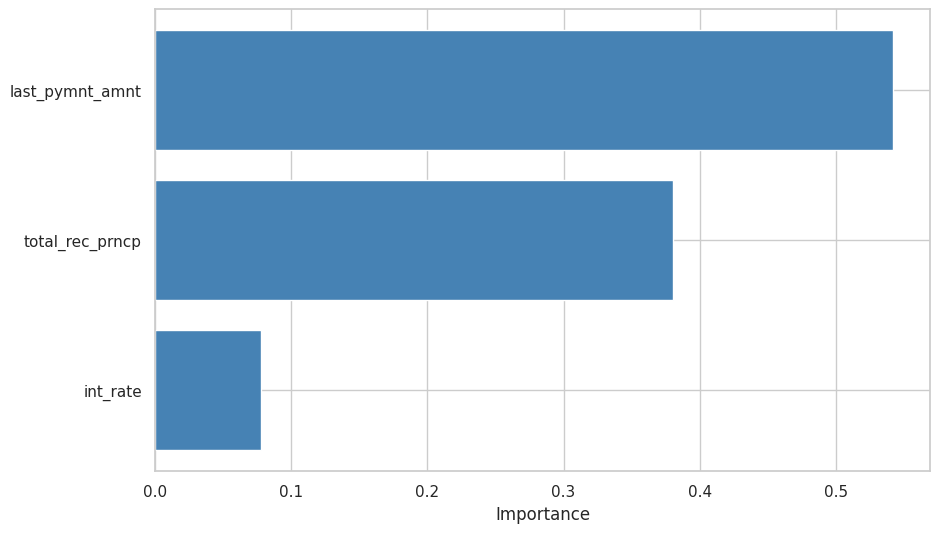

In [190]:
#Visualize the feature importances for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.gca().invert_yaxis()  
plt.show

### Decision tree

In [191]:
#Get feature importances
impt = decision_tree_model.feature_importances_

#Create a DataFrame to view the features and their importance scores
features_df1 = pd.DataFrame({'Feature': X.columns, 'Importance': impt})

#Sort the DataFrame to see the most important features at the top
features_df1.sort_values(by='Importance', ascending=False, inplace=True)

print(features_df1)

           Feature  Importance
2  last_pymnt_amnt        0.67
1  total_rec_prncp        0.30
0         int_rate        0.03


<function matplotlib.pyplot.show(close=None, block=None)>

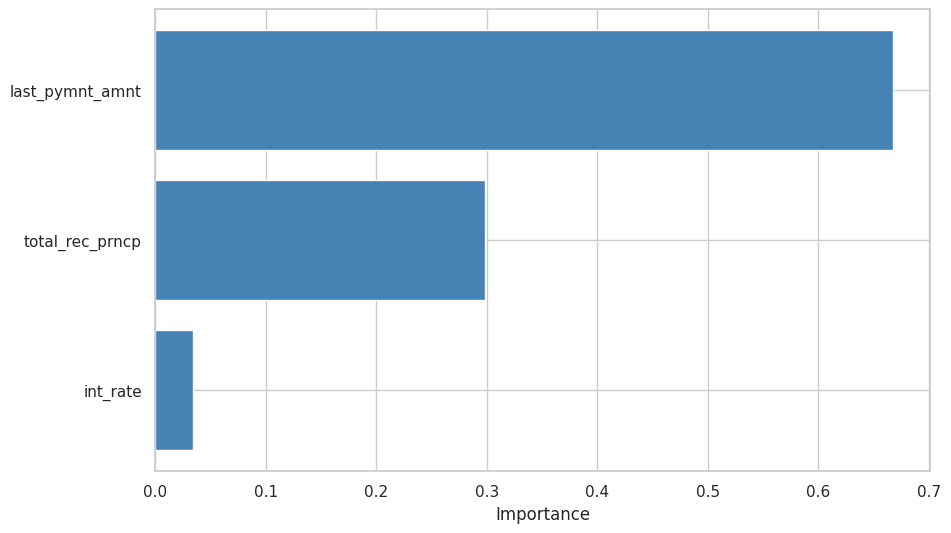

In [192]:
#Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df1['Feature'], features_df1['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.gca().invert_yaxis()  
plt.show

## Model Comparison

### Confusion Matrix

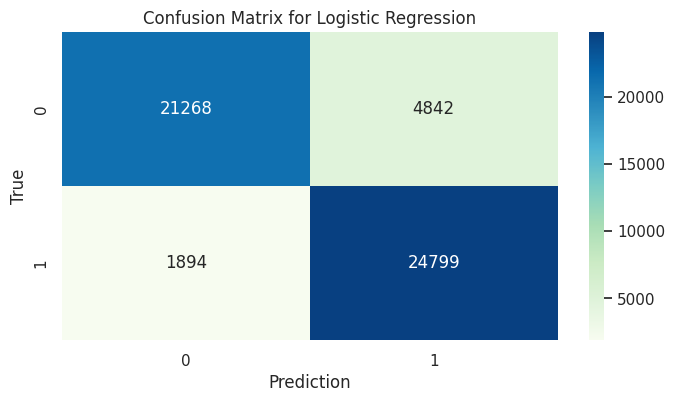

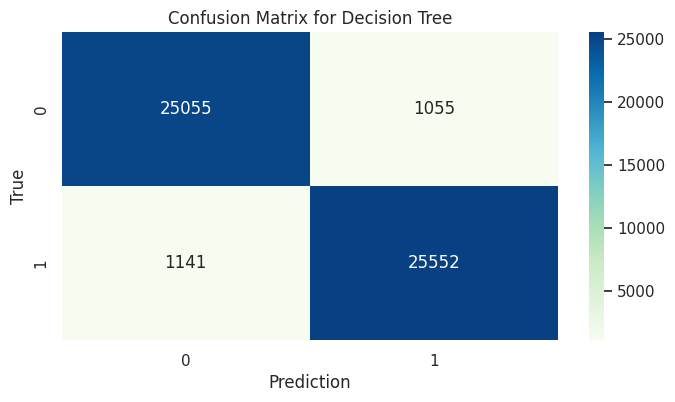

In [193]:
#Confusion matrix
y_preds = {
    "Logistic Regression": y_pred_logistic,
    "Random Forest": y_pred_rf,
    "Decision Tree": y_pred_dt
}

for model_name, y_pred in y_preds.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', cbar=True)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.show()

### ROC curve

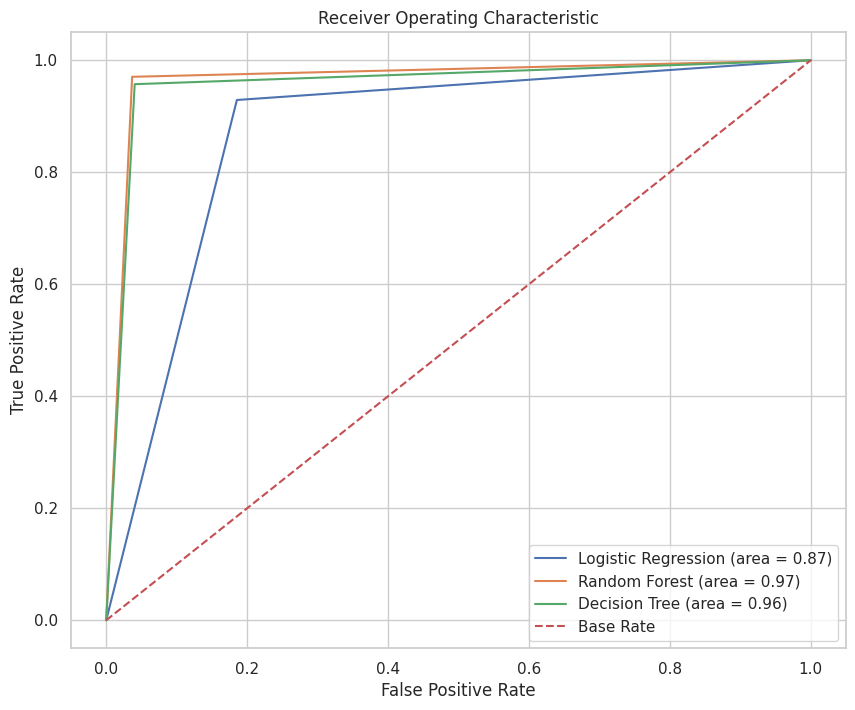

In [194]:
#Calculate ROC curve points
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)

#ROC-AUC scores for the plots
roc_auc_logistic = roc_auc_score(y_test, y_pred_logistic)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

#Create plots for ROC curves
plt.figure(figsize=(10, 8))

#Plot Logistic Regression ROC
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (area = {roc_auc_logistic:.2f})')

#Plot Random Forest ROC
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')

#Plot Decision Tree ROC
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (area = {roc_auc_dt:.2f})')

#Plot Base Rate ROC
plt.plot([0, 1], [0, 1], linestyle='--', label='Base Rate')

#Customizing the plot
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.show()

#### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. Hence, both the Random Forest and Decision Tree models perform slightly better than Logistic Regression in this case, as indicated by their curves being closer to the top-left corner.

## Now, we are going to drop ''int_rate'' see if model accuracy changes

In [195]:
#Selecting the features and target
X = df5[['total_rec_prncp', 'last_pymnt_amnt']]
y = df5['loan_status']

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

#Create a pipeline that standardizes the data then applies logistic regression
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('logistic', LogisticRegression(max_iter=1000))])
pipeline.fit(X_train, y_train)

#Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=1234)
random_forest_model.fit(X_train, y_train)

#Decision tree
decision_tree_model = DecisionTreeClassifier(random_state=1234)
decision_tree_model.fit(X_train, y_train)

#Predict on the test set
y_pred_logistic = pipeline.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_dt = decision_tree_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     26110
           1       0.82      0.93      0.87     26693

    accuracy                           0.86     52803
   macro avg       0.87      0.86      0.86     52803
weighted avg       0.87      0.86      0.86     52803

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26110
           1       0.97      0.97      0.97     26693

    accuracy                           0.97     52803
   macro avg       0.97      0.97      0.97     52803
weighted avg       0.97      0.97      0.97     52803

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     26110
           1       0.97      0.96      0.97     26693

    accuracy                           0.97     52803
   macro av

## Removing features ''int_rate'' and "total_rec_prncp" see if model accuracy changes

In [196]:
#Selecting the features and target
X = df5[['last_pymnt_amnt']]
y = df5['loan_status']

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

#Create a pipeline that standardizes the data then applies logistic regression
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('logistic', LogisticRegression(max_iter=1000))])
pipeline.fit(X_train, y_train)

#Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=1234)
random_forest_model.fit(X_train, y_train)

#Decision tree
decision_tree_model = DecisionTreeClassifier(random_state=1234)
decision_tree_model.fit(X_train, y_train)

#Predict on the test set
y_pred_logistic = pipeline.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_dt = decision_tree_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     26110
           1       0.77      0.99      0.87     26693

    accuracy                           0.85     52803
   macro avg       0.88      0.85      0.85     52803
weighted avg       0.88      0.85      0.85     52803

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88     26110
           1       0.87      0.90      0.88     26693

    accuracy                           0.88     52803
   macro avg       0.88      0.88      0.88     52803
weighted avg       0.88      0.88      0.88     52803

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     26110
           1       0.87      0.88      0.88     26693

    accuracy                           0.88     52803
   macro av

## Correlation Matrix Explanation for Natural Disasters

In [197]:
target_variable = 'loan_status'

#Find features with significant correlation with the target variable
significant_correlations = corr[target_variable].drop(target_variable).where(lambda x: abs(x) > threshold)

#Print
for feature, corr_value in significant_correlations.items():
    print(f"{feature} and {target_variable} have a correlation of {corr_value:.2f}")

loan_amnt and loan_status have a correlation of nan
int_rate and loan_status have a correlation of 0.30
installment and loan_status have a correlation of nan
annual_inc and loan_status have a correlation of nan
dti and loan_status have a correlation of nan
open_acc and loan_status have a correlation of nan
revol_util and loan_status have a correlation of nan
total_acc and loan_status have a correlation of nan
out_prncp and loan_status have a correlation of nan
total_pymnt and loan_status have a correlation of -0.42
total_rec_prncp and loan_status have a correlation of -0.60
total_rec_int and loan_status have a correlation of nan
last_pymnt_amnt and loan_status have a correlation of -0.53
tot_cur_bal and loan_status have a correlation of nan
total_rev_hi_lim and loan_status have a correlation of nan
acc_open_past_24mths and loan_status have a correlation of nan
bc_open_to_buy and loan_status have a correlation of nan
bc_util and loan_status have a correlation of nan
mo_sin_old_il_acct a

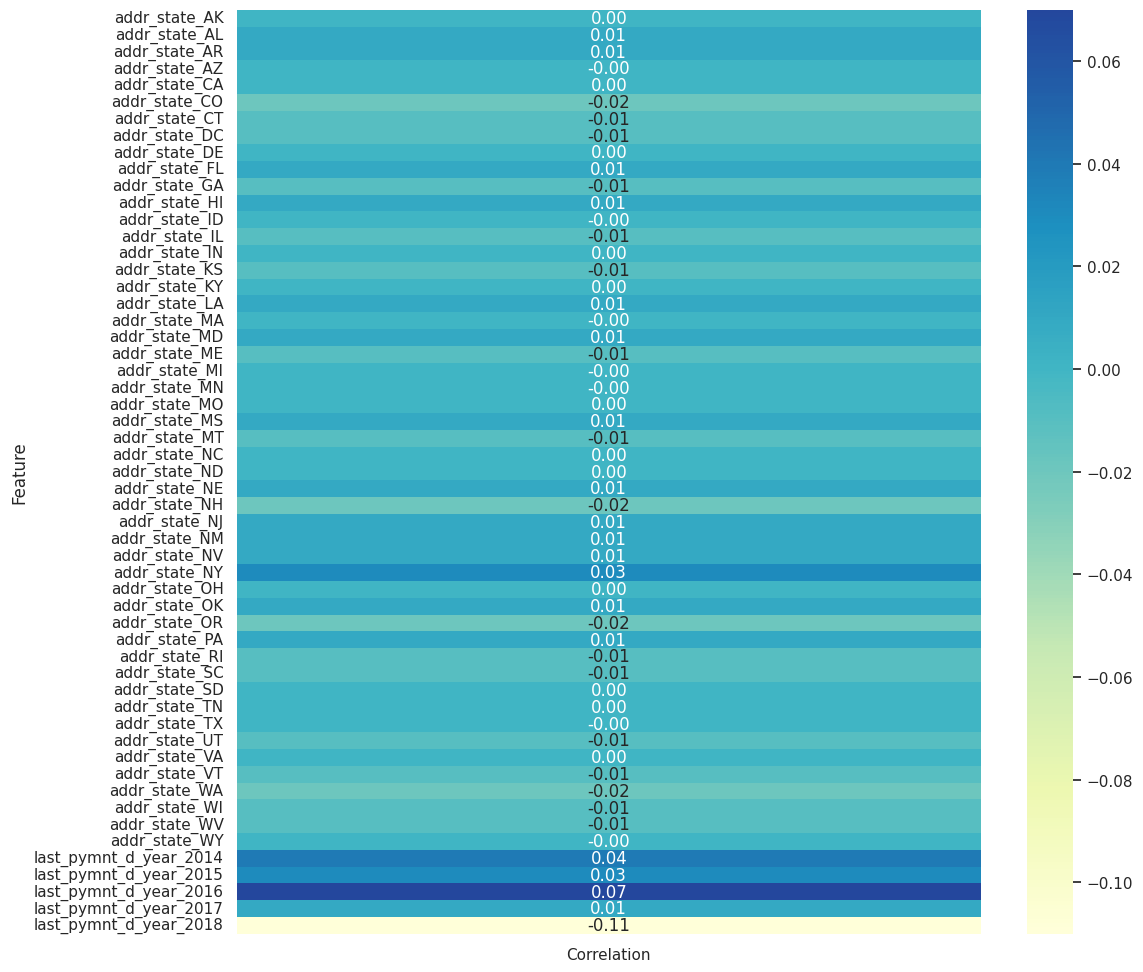

In [198]:
# 'significant_correlations' is a dictionary containing correlation values
significant_correlations = {
    'addr_state_AK': 0.00, 'addr_state_AL': 0.01, 'addr_state_AR': 0.01, 'addr_state_AZ': -0.00,
    'addr_state_CA': 0.00, 'addr_state_CO': -0.02, 'addr_state_CT': -0.01, 'addr_state_DC': -0.01,
    'addr_state_DE': 0.00, 'addr_state_FL': 0.01, 'addr_state_GA': -0.01, 'addr_state_HI': 0.01,
    'addr_state_ID': -0.00, 'addr_state_IL': -0.01, 'addr_state_IN': 0.00, 'addr_state_KS': -0.01,
    'addr_state_KY': 0.00, 'addr_state_LA': 0.01, 'addr_state_MA': -0.00, 'addr_state_MD': 0.01,
    'addr_state_ME': -0.01, 'addr_state_MI': -0.00, 'addr_state_MN': -0.00, 'addr_state_MO': 0.00,
    'addr_state_MS': 0.01, 'addr_state_MT': -0.01, 'addr_state_NC': 0.00, 'addr_state_ND': 0.00,
    'addr_state_NE': 0.01, 'addr_state_NH': -0.02, 'addr_state_NJ': 0.01, 'addr_state_NM': 0.01,
    'addr_state_NV': 0.01, 'addr_state_NY': 0.03, 'addr_state_OH': 0.00, 'addr_state_OK': 0.01,
    'addr_state_OR': -0.02, 'addr_state_PA': 0.01, 'addr_state_RI': -0.01, 'addr_state_SC': -0.01,
    'addr_state_SD': 0.00, 'addr_state_TN': 0.00, 'addr_state_TX': -0.00, 'addr_state_UT': -0.01,
    'addr_state_VA': 0.00, 'addr_state_VT': -0.01, 'addr_state_WA': -0.02, 'addr_state_WI': -0.01,
    'addr_state_WV': -0.01, 'addr_state_WY': -0.00,
    'last_pymnt_d_year_2014': 0.04, 'last_pymnt_d_year_2015': 0.03, 'last_pymnt_d_year_2016': 0.07,
    'last_pymnt_d_year_2017': 0.01, 'last_pymnt_d_year_2018': -0.11
}

# Create a DataFrame from significant_correlations
corr_df = pd.DataFrame(significant_correlations.items(), columns=['Feature', 'Correlation'])

# Reshape DataFrame to prepare for heatmap
corr_matrix = corr_df.set_index('Feature')

# Plot heatmap
plt.figure(figsize=(12, 12))  # Change the values here to adjust width and height
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', center=0, fmt=".2f")
plt.show()

# Final Evaluation

**Coefficients in the Logistic Regression:**
* 'int_rate' has a positive coefficient of 0.78 (indicating that as the interest rate increases, the likelihood of loan default also increases)
* 'total_rec_prncp' (-1.49) and 'last_pymnt_amnt' (-7.63) have negative coefficients (indicating that higher values of these variables are associated with a lower likelihood of default)

This supports the research question by providing insights into the relationship between financial attributes and loan defaults.

**Feature Importance Score for Random Forest and Decision Tree models:**

*Random Forest*
* 'last_pymnt_amnt' (0.54) is the most important feature
* 'total_rec_prncp' (0.38) is the next most important feature
* 'int_rate' (0.08) is the least important feature

*Decision Tree*
* 'last_pymnt_amnt' (0.67) is the most important feature
* 'total_rec_prncp' (0.30) is the next most important feature
* 'int_rate' (0.03) is the least important feature

Overall, these scores suggest that 'last_pymnt_amnt' is the most important feature for predicting loan defaults, followed by 'total_rec_prncp,' and 'int_rate'

This supports the research question by identifying that 'last_pymnt_amnt,' a financial attribute, is highly influential in predicting loan default. 

**Research Question:**

Financial attributes such as the last payment amount ('last_pymnt_amnt') and the total received principal ('total_rec_prncp') are significant predictors of loan defaults, with higher values of these attributes associated with a lower likelihood of default, as determined by Advanced Machine Learning techniques applied to loans issued between 2012 and 2019.

**Alternative Hypothesis (H1):**

We accept the Alternative Hypothesis (H1) as there is evidence suggesting a significant relationship between at least one of the borrower details, financial attributes, or potential interactions and loan defaults for loans issued between 2012 and 2019 using Advanced Machine Learning techniques.

**Null Hypothesis (H0):**

We reject the Null Hypothesis (H0) as evidence supports the existence of a significant relationship between the identified features and loan defaults.

**Best Performing Model:**

The Random Forest model where we excluded the variable 'int_rate' from the analysis, appears to be the best for predicting loan defaults, as it achieves the highest overall performance in metrics in precision, recall, F1-score, and accuracy. 